In [1]:
import os

#Tables and matrices
import numpy as np
import pandas as pd

#Stats
import scipy.stats as st
from scipy.optimize import fmin
from scipy import integrate
from scipy.stats.mstats import mquantiles
import statistics 

#Probabilistic programs
#!pip install pymc3
#!pip install pymc==4.0.0b1
import pymc3 as pm
#import pymc as pm
#import aesara.tensor as at
import theano.tensor as tt 
from theano.compile.ops import as_op
print('Running on PyMC v{}'.format(pm.__version__))


#Graphs
import seaborn as sns
import plotly.graph_objects as go
import altair as alt
from altair_saver import save #ademas instalar en terminal: brew cask install chromedriver
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.gridspec import GridSpec
from matplotlib import animation, rc
from IPython.display import display, HTML, Markdown
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, HBox, VBox, Layout
from graphviz import Source, Digraph
import dot2tex as d2t
from latex import build_pdf
from mpl_toolkits.mplot3d import axes3d
import arviz as az

#User-defined functions (in the same folder as the notebook)
import my_fun as mf



Running on PyMC v3.11.4


# Decision-making (risk)

Santiago Alonso-Díaz, PhD <br>
Universidad Javeriana

95 years old men with a tumor 
- 0.9 probability that is cancerous 
- If not, he has 34.8 months of life
- If bad:
    - With radiotherapy,  16.7 months of life
    - With surgery, 0.35 prob. of dying, 0.65 of 20.3 months of life
    - Without treatment, 5.6 months of life
    - Radiotherapy or surgery reduces months of life by an additional 1 month

Show that the radiotherapy is the preferred treatment (i.e. that expected value is 17.5 months of life)


In decision theory, the assumption is that we chose based on expected utility

$$ U(x) = p(x) v(x)$$

Question 1: Is probability the same as risk? No

Question 2: Is risk the same as uncertainty? No

The word risk has increased in usage (Li & Hertwig, 2020)
<center><img src="img/6_CB/Li1.svg" width = "400" height = '400'></center>


Main associations with risk (Li & Hertwig, 2020)
<center><img src="img/6_CB/Li2.svg" width = "400" height = '400'></center>

Risk preferences in different domains correlate (Dohmen, et al, 2011)
<center><img src="img/6_CB/Dohmen1.png" width = "500" height = '500'></center>

<div align="center" style = "font-size: 70px"> What is risk? </div>

In [2]:
# In risk, we know the probability distribution of the event.
# We can have different measures of risk from the probability distributions (e.g. variance)
wD = widgets.Dropdown(options=[('Normal', 0), 
                               ('Uniform', 1), 
                               ('Log-Normal', 2)],
                        value=0, description='Distr.: ')
out = widgets.interactive_output(mf.dropdown_callback,{'distr': wD})
VBox([wD, out])

<div align="center" style = "font-size: 70px"> Risk attitudes in economics </div>

In [3]:
# Risk attitudes as concavity of the utility function
# High value, low probability, high risk
wD = widgets.FloatSlider(min = 0, max = 2, step = 0.01, value=1,
                        description = 'Attitude')
out = widgets.interactive_output(mf.slider_econ_risk,{'alpha': wD})
VBox([wD, out])

<div align="center" style = "font-size: 70px"> Risk attitudes in cognitive and behavioral sciences </div>

Hay muchas alternativas:
* Regret and disappointment theory (Bell, 1982, 1985; Loomes & Sugden, 1982)
* Priority heuristic (Brandstätter, Gigerenzer, & Hertwig, 2006)
* Transfer-of-attention exchange model (Birnbaum, 2008; Birnbaum & Chavez, 1997)
* Decision field theory (Busemeyer & Townsend, 1993; Roe, Busemeyer, & Townsend, 2001) 
* Weighted utility theory (e.g. Fishburn, 1983)
* Proportional difference model (González-Vallejo, 2002) 
* Decision affect theory (Mellers, 2000) 
* Dual system model of preference under risk (Mukherjee, 2010) 
* Rank-dependent expected utility theories (e.g., Quiggin, 1982)
* Decisions by sampling (Stewart, Chater, & Brown, 2006)
* Prospect theory (Kahneman & Tversky, 1979)

<div align="center" style = "font-size: 70px"> How can we measure risk? </div>


* Self-reports
    * Sensation seeking (Zuckerman, Eysenck, & Eysenck, 1978)
    * Adventure seeking (Eysenck, Pearson, Easting, & Allsopp, 1985)
    * Impulsivity (Barratt, 1985; Eysenck et al., 1985)
    * Others (Frey, et al, 2017)
* Behavioral
    * The Balloon Analogue Risk Task (Lejuez, et al, 2002)
    * Loteries (Kahneman & Tversky, 1979)



# Descriptive Bayesian models of risk

# BART
<center><img src="img/6_CB/Lejuez1.png" width = "600" height = '600'></center>

<center><img src="img/6_CB/Lejuez2.png" width = "600" height = '600'></center>

Multiple trials. Different ballon colors signal different risks (the subject learns them by trial and error). Each pump increases the risk of explotion and dollars win.
<center><img src="img/6_CB/Lejuez3.png" width = "500" height = '500'></center>

### What type of risk is measured with BART?

Lejuez, et al, 2002 correlated BART with other measures

* Sensation seeking, impulsivity, empathy, depression, personality, drug addictions, gambling addiction, use of preservatives, others)



Optimal pumps (center) 
<center><img src="img/6_CB/Lejuez4.png" width = "600" height = '600'></center>

### Results

* Risk aversion ($pumps < pumps_{optimo}$)
* Low variability in orange and yellow

<center><img src="img/6_CB/Lejuez5.png" width = "600" height = '600'></center>

BART correlates with self-reports. Lejuez, et al, 2002 summarised the self-reports with (PCA, principal components analysis).

PCA (hypothetical example with two measures)
<center><img src="img/6_CB/GaussianScatterPCA.svg" width = "200" height = '200'></center>

PCA (Lejuez)

<center><img src="img/6_CB/Lejuez6.png" width = "600" height = '600'></center>

BART correlated with the PCA risk dimensions

<center><img src="img/6_CB/Lejuez7.png" width = "500" height = '500'></center>


### Discusion
* BART measures risk preferences, not fully captures with self-reports
* In BART, people are risk averse on average (fewer pumps than optimal).


### Application of BART task: Counterfactuals


<center><img src="img/6_CB/FitzGibbon1.png" width = "600" height = '600'></center>


What if?
* Would you pay to know what if, even it it is painful? 


Information is not always instrumental (i.e. no benefits), but satisfies curiosity.

<center><img src="img/6_CB/FitzGibbon2.png" width = "500" height = '520'></center>


Non-instrumental information activates brain areas related to reward (Fitzgibbon, et al, 2020)

<center><img src="img/6_CB/FitzGibbon3.png" width = "600" height = '600'></center>

Prediction: 
* Counterfactual curiosity is a strong motivator, even if it is costly.
* Fullfiled counterfactual curiosity induces changes in behavior (e.g. increase in risky choices) 

We can use BART to study counterfactual curiosity

<center><img src="img/6_CB/FitzGibbon4.png" width = "500" height = '500'></center>

<center><img src="img/6_CB/FitzGibbon5.png" width = "700" height = '700'></center>

The five experiments were similar, except cost (that was the intervention).
<center><img src="img/6_CB/FitzGibbon6.png" width = "600" height = '600'></center>

Turns with information increased regret (within-subject). Missed opportunity is the number of additional pumps available in the ballon.

<center><img src="img/6_CB/FitzGibbon7.png" width = "600" height = '600'></center>


### Bayesian BART model (BART chapter, Lee & Wagenmakers, 2013, textbook)

Task description: The probability of the balloon bursting is constant, and the expected gain of every decision to pump is zero.
<center><img src="img/6_CB/LeeWag1.png" width = "600" height = '600'></center>

$\gamma^{+}: \text{risk taking}, \ \beta: \text{consistency}, \ p: \text{belief of burst prob.}, \ d_{jk}: \text{observed choice}, \ Choice_k: \text{k pumps}, \\ \omega: \text{# of pumps considered optimal}, \theta_{jk}:\text{cashing prob.}$
<center><img src="img/6_CB/model_BART.svg" width = "451" height = '450'></center>



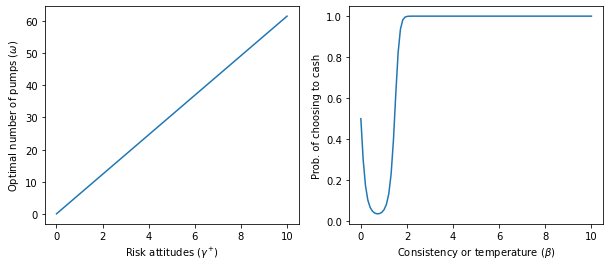

In [4]:
#Understanding/visualizing the parameters
p = 0.15 #(belief) prob. of bursting. Assumed by lee and wagenmakers
gammap = np.linspace(0,10,100)
beta = np.linspace(0,10,100)
omega = - (gammap)/(np.log(1-p))

#why omega is npumps_optimal conditional on a risk parameter gammap?
#let's rename omega to npumps_optim and do some basic algebra
#npumps_optim*np.log(1-p) = - gammap
#e^(npumps_optim*np.log(1-p)) = (e^-gammap)
#e^(np.log((prob_noburst)^npumps_optim)) = (e^-gammap)
#prob_noburst^npumps_optim = (e^-gammap) #important one
#Conditional on a gammap, the equality means that
#above is not tolerable, below is still tolerable. 
#npumps_optim fullfils the equality 

k = 9 #observed number of pumps
thetajk = 1/(1+np.exp(beta*(k-omega))) #beta is a temperature parameter

fig, ax = plt.subplots(1,2, figsize = [10,4])
ax[0].plot(gammap, omega)
ax[0].set_xlabel('Risk attitudes ($\\gamma^{+}$)')
ax[0].set_ylabel('Optimal number of pumps ($\\omega$)')

ax[1].plot(beta, thetajk)
ax[1].set_xlabel('Consistency or temperature ($\\beta$)')
ax[1].set_ylabel('Prob. of choosing to cash');


In [5]:
#The following implementation in PyMC3 was done by Junpeng Lao: 
# https://github.com/junpenglao/Bayesian-Cognitive-Modeling-in-Pymc3

#First: data setup
p = 0.15  # (Belief of) bursting probability
ntrials = 90  # Number of trials for the BART
extreme_npumps = 30 #some unlikely large number

Data = pd.read_csv("data/6_CB/GeorgeSober.txt", sep="\t") #subject named George (he can be sober, tipsy, or drunk; change the filename)
print(Data.groupby(['pres.bl']).mean())
#gr.fact: I think it is the visual growth of balloon i.e. a cue for the subject
#'prob': (real) of bursting; 
#'pumps': on that trial; 
#'cash': won on the trial; 'total': cash so far

cash = np.asarray(Data["cash"] != 0, dtype=int)
npumps = np.asarray(Data["pumps"], dtype=int)
options = cash + npumps #type of choices experienced i.e. receiving some cash and pumping n times
d = np.full([ntrials, extreme_npumps], np.nan) 
k = np.full([ntrials, extreme_npumps], np.nan) 
# response vector
for j, ipumps in enumerate(npumps): 
    inds = np.arange(options[j], dtype=int) 
    k[j, inds] = inds + 1 #+1 because arange starts at 0
    if ipumps > 0:
        d[j, 0:ipumps] = 0
    if cash[j] == 1:
        d[j, ipumps] = 1

indexmask = np.isfinite(d) #to clean nans
d = d[indexmask] #vector with cashing decisions (0:no, 1: yes); a 0 along a reset of k below means a burst 
k = k[indexmask] #vector with number of pumps at each decision point in d



         block  gr.fact  prob.  trial     pumps   cash     total
pres.bl                                                         
1          2.0   0.1765   15.0   15.5  2.333333  0.483  7.545333
2          1.0   0.1111   10.0   15.5  2.800000  0.471  6.801333
3          3.0   0.2500   20.0   15.5  2.033333  0.553  9.547000


In [ ]:
npumps 

<ipython-input-6-c375a04d64fe>:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(tune=2000, cores=4, chains = 4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, gammap]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 19 seconds.


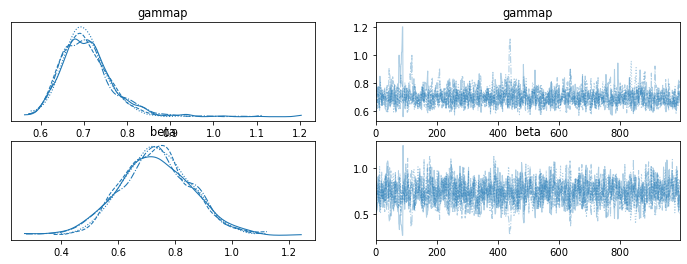

In [6]:
with pm.Model():
    #Priors
    gammap = pm.Uniform("gammap", lower=0, upper=10, testval=1.2)
    beta = pm.Uniform("beta", lower=0, upper=10, testval=0.5)
    omega = pm.Deterministic("omega", -gammap / np.log(1 - p))
    
    #Likelihood
    thetajk = 1 - pm.math.invlogit(-beta * (k - omega))

    djk = pm.Bernoulli("djk", p=thetajk, observed=d)

    trace = pm.sample(tune=2000, cores=4, chains = 4)
    data = az.from_pymc3(trace=trace)


az.plot_trace(data, var_names=["gammap", "beta"]);

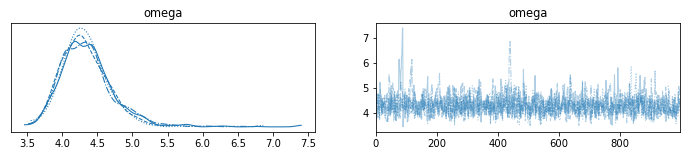

In [7]:
az.plot_trace(data, var_names=["omega"]);

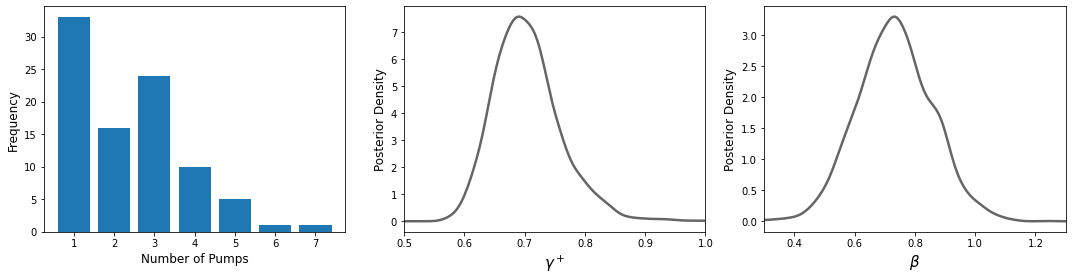

In [8]:
#This plots the fig. 16.3 of lee, wagenmakers, 2013, textbook
gammaplus = trace["gammap"]
beta = trace["beta"]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(npumps, bins=range(1, 9), rwidth=0.8, align="left")
axes[0].set_xlabel("Number of Pumps", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
  
my_pdf1 = st.kde.gaussian_kde(gammaplus)
x1 = np.linspace(0.5, 1, 200)
axes[1].plot(x1, my_pdf1(x1), "k", lw=2.5, alpha=0.6)  # distribution function
axes[1].set_xlim((0.5, 1))
axes[1].set_xlabel(r"$\gamma^+$", fontsize=15)
axes[1].set_ylabel("Posterior Density", fontsize=12)

my_pdf2 = st.kde.gaussian_kde(beta)
x2 = np.linspace(0.3, 1.3, 200)
axes[2].plot(
    x2, my_pdf2(x2), "k", lw=2.5, alpha=0.6,
)  # distribution function
axes[2].set_xlim((0.3, 1.3))
axes[2].set_xlabel(r"$\beta$", fontsize=15)
axes[2].set_ylabel("Posterior Density", fontsize=12)

plt.tight_layout();

# Exercises

1) Apply the model to data from a different subject, Bill, provided in the file BillSober.txt. Compare the estimated parameters for George and Bill. Who has the greater propensity for risk?

2) What happens if two pumps are added to each trial for George’s data? Make this change to the npumps variable (i.e. duplicate npumps). Which of the two parameters changed the most?

3) Modify George’s data in a different way to affect the behavioral consistency parameter.

### But what does it mean? 

We have data from the same subject with different alcohol levels. We can estimate parameters for each level or do a hierarchical model. Let's do the latter.

Alcohol and risk.

Example 1 (driving) (Burian, Liguori, & Robinson,2002).

Penalty severity decreases risky driving in those without alcohol (top panel).

In the most extreme penalty, alcohol increases risky driving (inverted u-shape) (bottom panel) 
<center><img src="img/6_CB/Risk_drive_alcohol.png" width = "500" height = '500'></center>

Example 2 (unsafe sex)

Similar to driving, there seems to be an inverse-u shaped effect of alcohol in risky behavior

<center><img src="img/6_CB/Risk_sex_preservatives.png" width = "500" height = '500'></center>


## A hierarchical extension of the BART model
  
  
$$ \mu_{\gamma^{+}} \sim \text{Uniform}(0,10) $$
$$ \sigma_{\gamma^{+}} \sim \text{Uniform}(0,10) $$
$$ \mu_{\beta} \sim \text{Uniform}(0,10) $$
$$ \sigma_{\beta} \sim \text{Uniform}(0,10) $$
$$ \gamma^{+}_i \sim \text{Gaussian}(\mu_{\gamma^{+}}, 1/\sigma_{\gamma^{+}}^2) $$
$$ \beta_i \sim \text{Gaussian}(\mu_{\beta}, 1/\sigma_{\beta}^2) $$
$$ \omega_i = -\gamma^{+}_i \,/\,\text{log}(1-p) $$
$$ \theta_{ijk} = \frac{1} {1+e^{\beta_i(k-\omega_i)}} $$
$$ d_{ijk} \sim \text{Bernoulli}(\theta_{ijk}) $$

# Class discussion
How can we change the graphical model below so that it is hierarchical?
<center><img src="img/6_CB/model_BART.svg" width = "451" height = '450'></center>


Hierarchical means we assume a common source for the parameters risk and consistency. The common source is the subject (e.g. George). The parameters change according to the alcohol level conditions
<center><img src="img/6_CB/model_BART_hierarchical.svg" width = "500" height = '500'></center>

In [9]:
p = 0.15  # (Belief of) bursting probability
ntrials = 90  # Number of trials for the BART
Ncond = 3
extreme_npumps = 30 #some unlikely large number

dall = np.full([Ncond, ntrials, extreme_npumps], np.nan)
options = np.zeros((Ncond, ntrials))
kall = np.full([Ncond, ntrials, extreme_npumps], np.nan)
npumps_ = np.zeros((Ncond, ntrials))

for icondi in range(Ncond):
    if icondi == 0:
        Data = pd.read_csv("data/6_CB/GeorgeSober.txt", sep="\t")
    elif icondi == 1:
        Data = pd.read_csv("data/6_CB/GeorgeTipsy.txt", sep="\t")
    elif icondi == 2:
        Data = pd.read_csv("data/6_CB/GeorgeDrunk.txt", sep="\t")
    # Data.head()
    cash = np.asarray(Data["cash"] != 0, dtype=int)
    npumps = np.asarray(Data["pumps"], dtype=int)
    npumps_[icondi, :] = npumps
    options[icondi, :] = cash + npumps
    # response vector
    for j, ipumps in enumerate(npumps):
        inds = np.arange(options[icondi, j], dtype=int)
        kall[icondi, j, inds] = inds + 1
        if ipumps > 0:
            dall[icondi, j, 0:ipumps] = 0
        if cash[j] == 1:
            dall[icondi, j, ipumps] = 1

indexmask = np.isfinite(dall)
dij = dall[indexmask]
kij = kall[indexmask]
condall = np.tile(np.arange(Ncond, dtype=int), (30, ntrials, 1))
condall = np.swapaxes(condall, 0, 2)
cij = condall[indexmask] #condition index (for dij and kij)

Finished [100%]: Average Loss = 418.51
<ipython-input-10-e61851fc3458>:25: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace2 = pm.sample(
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 10 jobs)
NUTS: [beta, gammap, sigma_b, mu_b, sigma_g, mu_g]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 61 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


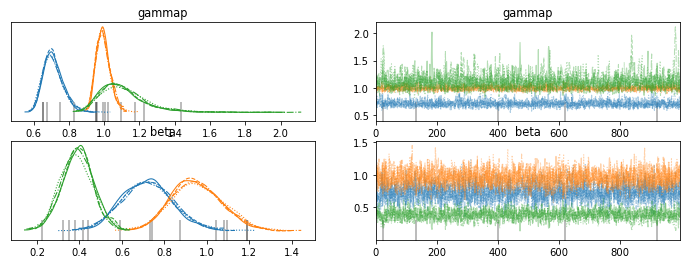

In [10]:
chains = 4
with pm.Model() as model2:
    #Hyperparameters for hierarchical priors
    mu_g = pm.Uniform("mu_g", lower=0, upper=10)
    sigma_g = pm.Uniform("sigma_g", lower=0, upper=10)
    mu_b = pm.Uniform("mu_b", lower=0, upper=10)
    sigma_b = pm.Uniform("sigma_b", lower=0, upper=10)
    
    #Priors (lower level)
    gammap = pm.Normal("gammap", mu=mu_g, sd=sigma_g, shape=Ncond)
    beta = pm.Normal("beta", mu=mu_b, sd=sigma_b, shape=Ncond)

    #Likelihood
    omega = -gammap[cij] / np.log(1 - p)
    thetajk = 1 - pm.math.invlogit(-beta[cij] * (kij - omega))
    
    djk = pm.Bernoulli("djk", p=thetajk, observed=dij)
    
    #get starting values with variational inference
    approx = pm.fit(
        n=100000, method="advi", obj_optimizer=pm.adagrad_window
    )  # type: pm.MeanField
    start = approx.sample(draws=chains, include_transformed=True)
    #sample
    trace2 = pm.sample(
         tune=2000, target_accept=0.95, chains=chains, 
        cores = 10, init="adapt_diag", start=list(start)
    )
    data = az.from_pymc3(trace=trace2)



az.plot_trace(data, var_names=["gammap", "beta"], compact=True);

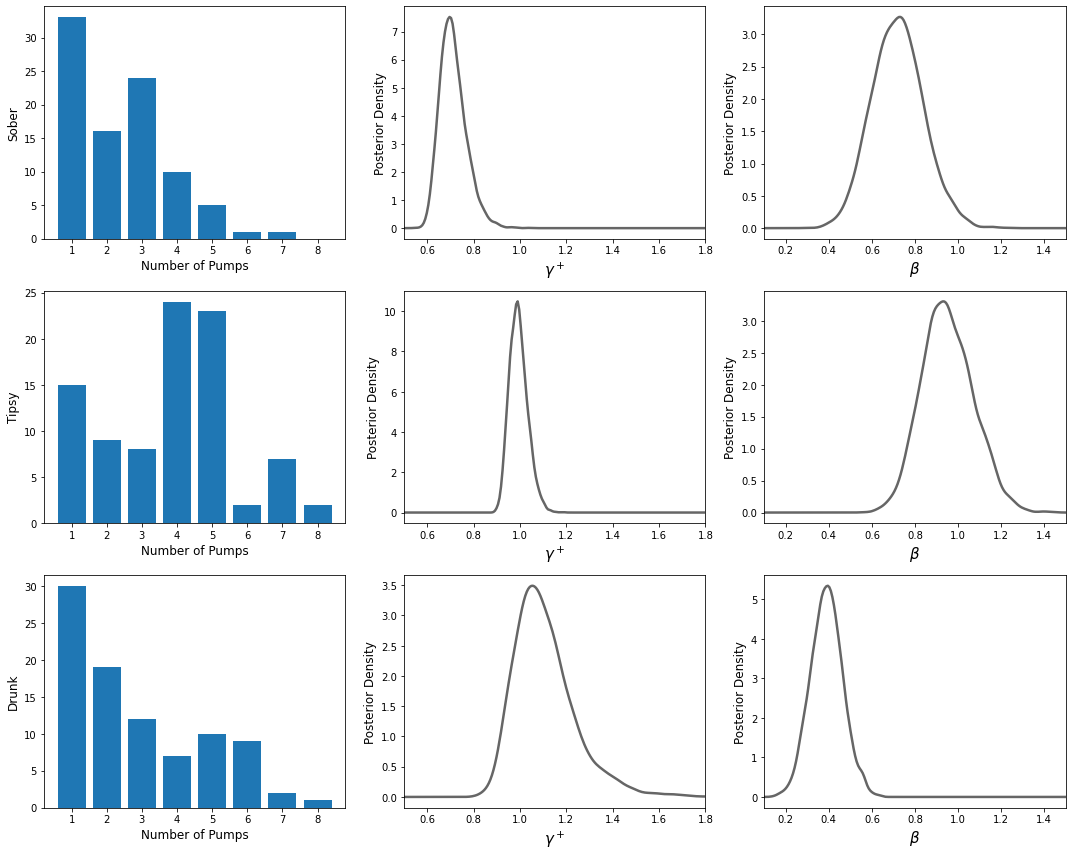

In [11]:
gammaplus = trace2["gammap"]
beta = trace2["beta"]
ylabels = ["Sober", "Tipsy", "Drunk"]

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for ic in range(Ncond):
    ax0 = axes[ic, 0]
    ax0.hist(npumps_[ic], bins=range(1, 10), rwidth=0.8, align="left")
    ax0.set_xlabel("Number of Pumps", fontsize=12)
    ax0.set_ylabel(ylabels[ic], fontsize=12)

    ax1 = axes[ic, 1]
    my_pdf1 = st.kde.gaussian_kde(gammaplus[:, ic])
    x1 = np.linspace(0.5, 1.8, 200)
    ax1.plot(x1, my_pdf1(x1), "k", lw=2.5, alpha=0.6)  # distribution function
    ax1.set_xlim((0.5, 1.8))
    ax1.set_xlabel(r"$\gamma^+$", fontsize=15)
    ax1.set_ylabel("Posterior Density", fontsize=12)

    ax2 = axes[ic, 2]
    my_pdf2 = st.kde.gaussian_kde(beta[:, ic])
    x2 = np.linspace(0.1, 1.5, 200)
    ax2.plot(x2, my_pdf2(x2), "k", lw=2.5, alpha=0.6)  # distribution function
    ax2.set_xlim((0.1, 1.5))
    ax2.set_xlabel(r"$\beta$", fontsize=15)
    ax2.set_ylabel("Posterior Density", fontsize=12)

plt.tight_layout();

# Exercises

1) Apply the model to the data from the other subject, Bill. Does alcohol have the same effect on Bill as it did on George?

2) Apply the non-hierarchical model to each of the six data files independently. Compare the results for the two parameters to those obtained from the hierarchical model, and explain any differences.

3) The hierarchical model provides a structured relationship between the drinking conditions, but is still applied independently to each subject. Many of the applications of hierarchical modeling considered in our case studies, however, involve structured relationships between subjects, to capture individual differences. Develop a graphical model that extends the hierarchical model above to incorporate hierarchical structure both for drinking conditions and subjects. How could interactions between these two factors be modeled?

Now let's apply a BART model to the counterfactual paper by FitzGibbon, et al (2021, Psych. Science). 

Let's model their hypothesis/finding that seeking counterfactual information affects emotions and behavior:

<center><img src="img/6_CB/FitzGibbon9.png" width = "800" height = '800'></center>

<center><img src="img/6_CB/FitzGibbon8.png" width = "800" height = '800'></center>

Discussion/exercise

How would you extend the non-hierarchical BART diagram to measure FitzGibbon hypothesis/finding? What does behavior adjustment mean? Risk $\gamma^+$ or consistency $\beta$? Both? Why?


Fitzgibbon suggest changes in risk: "The worse participants felt, the riskier they became on the next trial" pp. 9. 

Let's focus on that possibility

Diagram done  in https://app.diagrams.net/. We model change in emotion in trial t and number of pumps in the trial t + 1.

$\delta \ lim$ is missed opportunity i.e. n_pumps - balloon limit. 

$\delta \ emo$ is change in emotion

$\zeta$ will tell us how much risk attitudes ($\gamma^+$) change with changes in emotion.

<center><img src="img/6_CB/model_BART_counterfactuals.svg" width = "800" height = '800'></center>

# Class exercise 
Expand the non-hierarchical pymc code to reflect this diagram

In [12]:
Data = pd.read_csv("data/6_CB/Counterfactual_Curiosity/E1.csv")
sID = Data['subject'].unique() 
for s in sID: #standardize emotion_change_rating by subject
    idx = Data['subject'] == s
    zscore = st.zscore(Data.loc[idx,'emotion_change_rating'])
    Data.loc[idx,'emotion_change_rating'] = zscore
s = 29 #subject to run or write 'all' for all subjects
#representative subjects E1: 
#1,6,11,12,13,18,19,20,21,22,24,27 (negative slope emotion-risk on avg parameters), 
#2,3,4,5,7,14,17,23,25,26,28,29 (positive slope)
# subject 27 E1 risk was highly affected by emotion according to the model
if s == 'all':
    idx = (Data['outcome'] == 'bank') &  (~Data['next_trial_n_pumps'].isna()) 
else:
    idx = (Data['subject'] == sID[s]) & (Data['outcome'] == 'bank') &  (~Data['next_trial_n_pumps'].isna())
Data = Data.loc[idx,:]
print(Data.columns)
#pump_value: how many points EACH pump gives
#n_pumps: # of pumps participant asked the rabbit to do
#limit: if n_pumps>limit then burst, else bank
#information columns: if sought, participants saw the limit of the balloon
#next_trial_points: pump_value_{trial+1}*n_pumps_{trial+1}
Data.shape


Index(['Unnamed: 0', 'study', 'subject', 'age', 'gender', 'trial',
       'time_elapsed', 'pump_value', 'n_pumps', 'limit', 'outcome',
       'outcome_ec', 'outcome_rating', 'diff_pumps_limit',
       'information_outcome', 'information_sought', 'information_received_ec',
       'emotion_change_rating', 'next_trial_n_pumps', 'next_trial_bank',
       'next_trial_points'],
      dtype='object')


(45, 21)

In [13]:
# Non-hierarchical BART for FitzGibbon, et al, 2021 (see appendix for hierarchical version)
p = 0.5
npump_max = 12 #from the Fitzgibbon experimental design
#emo_change_scale = [-200,200] #from the Fitzgibbon paper
emo_change_scale = [-3,3] #standardized (zscore; see cell above)
delta_emo_data = np.array(Data['emotion_change_rating'])
info = np.array(Data['information_sought'])
no_info = np.array(~np.array(Data['information_sought'], dtype = 'bool'), dtype = 'int')
diff_limit = np.array(Data['diff_pumps_limit'])
pump_value = np.array(Data['pump_value']) #including this does not make too much difference, it is uniform
npumps_next_trial = np.array(Data['next_trial_n_pumps'])
with pm.Model() as BART_CF:
    #priors
    kappas = pm.Uniform('kappas', 
                        lower = emo_change_scale[0], 
                        upper = emo_change_scale[1], shape = 4)
    sigma_emo = pm.Uniform('sigma_emo', lower = 0 , upper = 50 )
    maxgammap = pm.Uniform('maxgammap', lower = 0 , upper = 10)
    zeta = pm.Uniform('zeta', lower = -1, upper = 1) #it worked with -1,1 
    gammap = (maxgammap)/(1+tt.exp(-zeta*(delta_emo_data)))
    #gammap = (maxgammap)/(1+tt.exp(-zeta*(delta_emo_data*pump_value)))
    beta = pm.Normal("beta", mu = 0.8, sd = 0.2) #Based on the previous BART
    omega = pm.Deterministic("omega", -gammap / np.log(1 - p))
    
    
    #likelihood
    mu_emo = (kappas[0] + kappas[1]*diff_limit)*no_info + (kappas[2] + kappas[3]*diff_limit)*info
    delta_emoj = pm.Normal('delta_emo', mu = mu_emo, sigma = sigma_emo, 
                           observed = delta_emo_data)

    
    thetaj = 1 - pm.math.invlogit(-beta * (npumps_next_trial - omega)) 
    
    dj = pm.Binomial("dj", p=thetaj, n=npump_max, observed=npumps_next_trial)
    
    
    trace = pm.sample(tune=2000, target_accept = 0.99, cores = 4, chains = 4)
    
    data = az.from_pymc3(trace=trace)
    ppc = pm.sample_posterior_predictive(trace)




<ipython-input-13-f9614a6ded83>:37: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(tune=2000, target_accept = 0.99, cores = 4, chains = 4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, zeta, maxgammap, sigma_emo, kappas]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 45 seconds.


29


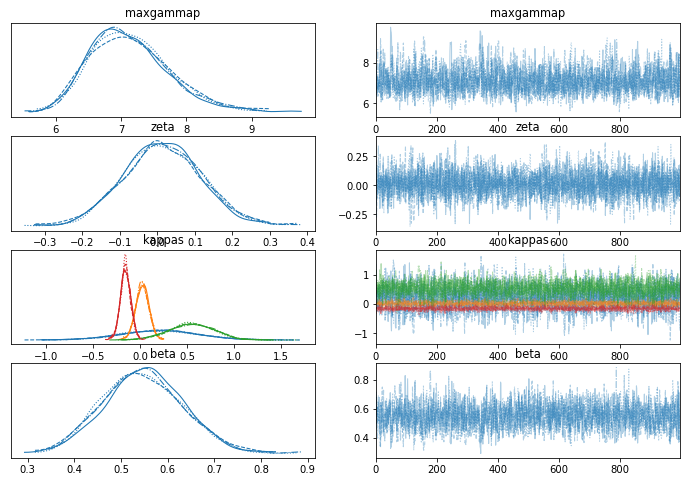

In [14]:
print(s)
az.plot_trace(data, var_names=["maxgammap", 'zeta', 'kappas', "beta"]);

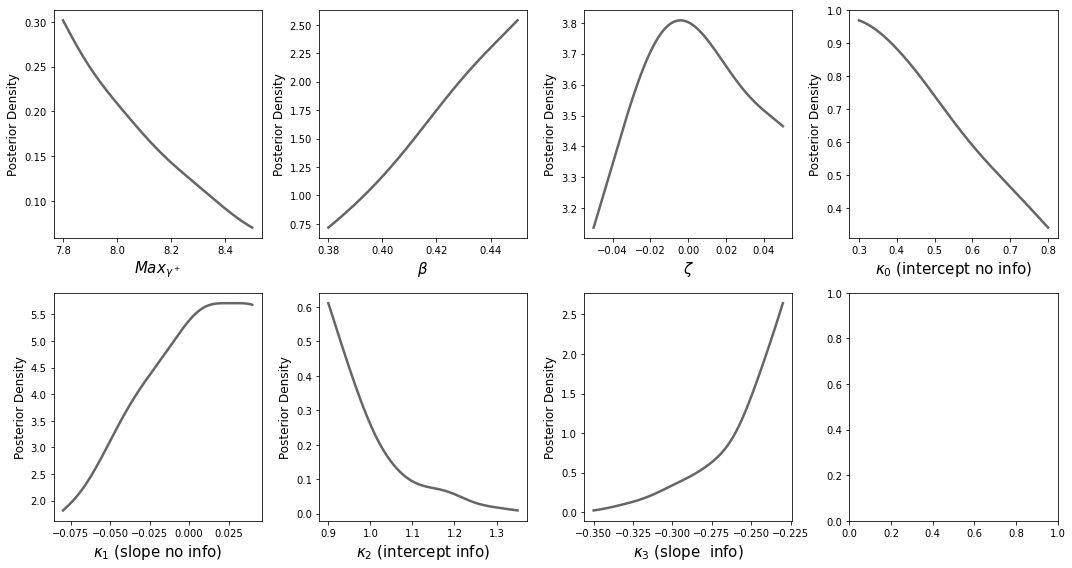

In [15]:
#Posterior plots
gammaplus = trace["maxgammap"]
beta = trace["beta"]
zeta = trace["zeta"]
kappas = trace["kappas"]

def myplot_cf(posterior, ax, xlim, xlab):
    my_pdf1 = st.kde.gaussian_kde(posterior)
    x1 = np.linspace(xlim[0], xlim[1], 1000)
    ax.plot(x1, my_pdf1(x1), "k", lw=2.5, alpha=0.6)  # distribution function
    ax.set_xlabel(xlab, fontsize=15)
    ax.set_ylabel("Posterior Density", fontsize=12)

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
myplot_cf(gammaplus, axes[0,0], [7.8,8.5], r"$Max_{\gamma^+}$")
myplot_cf(beta, axes[0,1], [0.38,0.45], r"$\beta$")
myplot_cf(zeta, axes[0,2], [-.05,.05], r"$\zeta$")
myplot_cf(kappas[:,0], axes[0,3], [0.3,0.8], r"$\kappa_0$ (intercept no info)")
myplot_cf(kappas[:,1], axes[1,0], [-.08,.04], r"$\kappa_1$ (slope no info)")
myplot_cf(kappas[:,2], axes[1,1], [0.9,1.35], r"$\kappa_2$ (intercept info)")
myplot_cf(kappas[:,3], axes[1,2], [-0.35,-0.23], r"$\kappa_3$ (slope  info)")


plt.tight_layout();

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


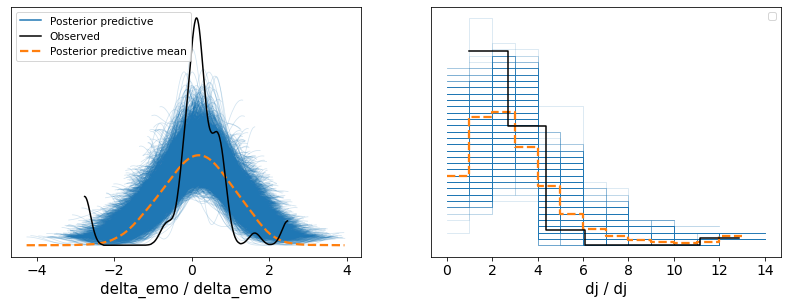

In [16]:
#Posterior predictive checks
#The model seems to qualitatively predict the data fairly well with some caveats.
#The two peaks on observed delta_emo seem to be only on no info trials (see appendix, hierarchical)
#Human subjects seem to overselect n pumps on the middle range (see dj observed)
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=BART_CF));

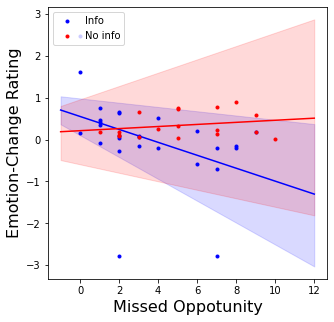

In [17]:
#The model seems to qualitatively predict the data fairly well
plt.figure(figsize=(5, 5)); 
idx = Data['information_sought']==1
plt.plot(diff_limit[idx], delta_emo_data[idx], '.b',  label = 'Info')
hdi_intercept = az.hdi(trace['kappas'][:,2]) #high density interval
hdi_slope = az.hdi(trace['kappas'][:,3])
x = np.linspace(-1,12)
y = trace['kappas'][:,3].mean()*x + trace['kappas'][:,2].mean()
plt.plot(x,y, color='blue')
plt.fill_between(y1=hdi_slope[0]*x + hdi_intercept[0], 
                 y2= hdi_slope[1]*x + hdi_intercept[1],
                 x=x, alpha=0.15, color='blue');
plt.ylabel("Emotion-Change Rating", fontsize=16); 
plt.xlabel("Missed Oppotunity", fontsize=16);


idx = Data['information_sought']==0
plt.plot(diff_limit[idx], delta_emo_data[idx], '.r',  label = 'No info')
hdi_intercept = az.hdi(trace['kappas'][:,0]) #high density interval
hdi_slope = az.hdi(trace['kappas'][:,1])
x = np.linspace(-1,12)
y = trace['kappas'][:,1].mean()*x + trace['kappas'][:,0].mean()
plt.plot(x,y, color='red')
plt.fill_between(y1=hdi_slope[0]*x + hdi_intercept[0], 
                 y2= hdi_slope[1]*x + hdi_intercept[1],
                 x=x, alpha=0.15, color='red');
#plt.ylim(-250,250)
plt.ylabel("Emotion-Change Rating", fontsize=16); 
plt.xlabel("Missed Oppotunity", fontsize=16);
plt.legend(loc = 'upper left');

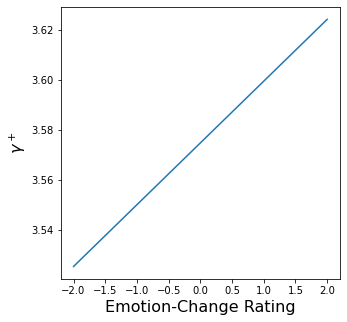

In [18]:
# On average parameters, risk attitudes change with 
# changes in emotion. But the effect size is tiny due to small zeta (see y scale).
# The model suggests that risk attitudes don't change dramatically.
# See appendix, for similar results with a hierarchical version (i.e. without logistics for gamma).
# The hierarchical version didn't find dramatic consistency differences (beta).
# In brief, either small changes in behavior explain FitzGibbon results, or
# something else not accounted for in the model (e.g. a change in policy different than beta)
# IMPORTANT: for all subjects in E1 including emotion change induced better waic and loo (see below). 
# i.e. is good to include it

plt.figure(figsize=(5, 5)); 
emmmo_diff = np.linspace(-2,2,300)
gammmma = gammaplus.mean()/(1+np.exp(-zeta.mean()*(emmmo_diff)))
plt.plot(emmmo_diff,gammmma)
plt.ylabel("$\gamma^+$", fontsize=16); 
plt.xlabel("Emotion-Change Rating", fontsize=16);
#plt.ylim(4.0850,4.0870)

In [19]:
#Null model
with pm.Model() as BART_CF_null:
    #priors
    kappas = pm.Uniform('kappas', 
                        lower = emo_change_scale[0], 
                        upper = emo_change_scale[1], shape = 4)
    sigma_emo = pm.Uniform('sigma_emo', lower = 0 , upper = 50)
    gammap = pm.Uniform('gammap', lower = 0 , upper = 10) 
    beta = pm.Normal("beta", mu = 0.8, sd = 0.2) #Based on the previous BART
    omega = pm.Deterministic("omega", -gammap / np.log(1 - p))
    
    
    #likelihood
    mu_emo = (kappas[0] + kappas[1]*diff_limit)*no_info + (kappas[2] + kappas[3]*diff_limit)*info
    delta_emoj = pm.Normal('delta_emo', mu = mu_emo, sigma = sigma_emo, 
                           observed = Data['emotion_change_rating'])
    
    thetaj = 1 - pm.math.invlogit(-beta * (npumps_next_trial - omega)) 
    
    dj = pm.Binomial("dj", p=thetaj, n=npump_max, observed=npumps_next_trial)

    trace_null = pm.sample(tune=2000, target_accept = 0.99, cores=4, chains = 4)
    data_null = az.from_pymc3(trace=trace_null)

<ipython-input-19-d41333376c81>:22: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_null = pm.sample(tune=2000, target_accept = 0.99, cores=4, chains = 4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, gammap, sigma_emo, kappas]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 25 seconds.


29


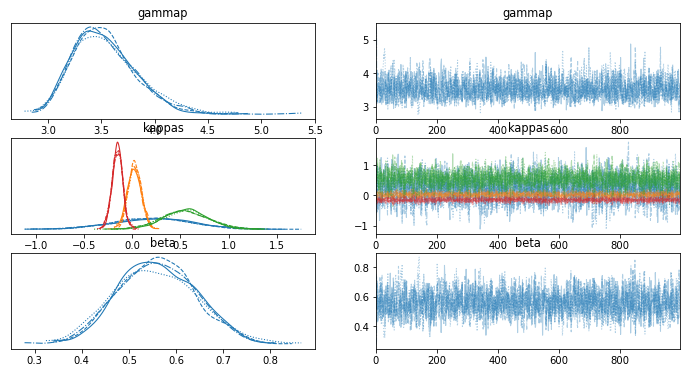

In [20]:
print(s)
az.plot_trace(data_null, var_names=["gammap", 'kappas', "beta"]);

In [50]:
#Model Comparison NOTE: run individual subjects for this cell (not enough ram).
#https://discourse.pymc.io/t/calculating-waic-for-models-with-multiple-likelihood-functions/4834/5
#The model comparison for individual subjects suggests that emotion is not a necessary modulator 
#of BART risk (WAIC is too close)

#if s == 'all': #not enough ram!
#    print('OOOPS: due to ram limits, only individual subject models!!')    
#else:
#    data.sample_stats["log_likelihood"] = data.log_likelihood['delta_emo'] + data.log_likelihood['dj']
#    data_null.sample_stats["log_likelihood"] = data_null.log_likelihood['delta_emo'] + data_null.log_likelihood['dj']
print(-2*az.waic(data, var_name = 'dj')[0]) #lower values better
print(-2*az.waic(data_null, var_name = 'dj')[0])
print(-2*az.waic(data, var_name = 'delta_emo')[0]) #lower values better
print(-2*az.waic(data_null, var_name = 'delta_emo')[0])


114.35857298292036
113.0978686764715
113.33897908332926
113.42648485474562


C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


# Exercise

<center><img src="img/6_CB/FitzGibbon10.png" width = "250" height = '250'></center>

1) There were 5 experiments in Fitzgibbon et al, 2021 paper. We just run data of Exp. 1. Run the previous model and analyses on Exp. 2 data (counterfactual information cost money). Before starting, do you expect different results? After running the model, are the results similar? Different?

2) How would you extend the base diagram to a hierarchical one for all 5 experiments?

<div align="center" style = "font-size: 70px"> Prospect Theory </div>

In [51]:
# Subjective value function prospect theory
wAw = widgets.FloatSlider(min = 0, max = 1, step = 0.01, value=0.3,
                        description = 'Alpha win')
wAl = widgets.FloatSlider(min = 0, max = 1, step = 0.01, value=0.15,
                        description = 'Alpha lose')
wLA = widgets.FloatSlider(min = 0, max = 2, step = 0.01, value=2,
                        description = 'Loss aversion')
out = widgets.interactive_output(mf.slider_econ_beh_risk,
                                 {'alpha_win': wAw,'alpha_lose': wAl, 
                                  'loss_aversion': wLA})
left_widgets = VBox([wAw, wAl])
right_widgets = VBox([wLA])
top = HBox([left_widgets, right_widgets])
VBox([top, out])

<div align="center" style = "font-size: 70px"> Perception of probabilities </div>

In [52]:
# Weighting function prospect theory
wT = widgets.FloatSlider(min = 0, max = 2, step = 0.01, value=0.5,
                        description = 'Theta')
out = widgets.interactive_output(mf.slider_econ_beh_prob, {'theta': wT})
VBox([wT, out])

Some biases that inspired prospect theory
* Optimism (downgrade negative risks)
* Status quo (reference point)
* Availability (risk and memory of events)
* Hindsight (what happened seems more probable)
* Framing effects (lose (p) vs win (1-p) are treated differently)

The effects appear in many populations
<center><img src="img/6_CB/Ruggeri1.svg" width = "700" height = '700'></center>

Prospect theory is succesful in explaining many biases (DESCRIPTED problems;  experimented-learned is another story)
<center><img src="img/6_CB/Ruggeri2.svg" width = "700" height = '700'></center>

Example of framing effects 
#### Win frame:
Imagine we gave you 1000 dollars. They are yours. What option do you prefer?
 * 50% of adding 1000, 50% of adding 0
 * 100% you get 500 more

#### Lose frame:
Imagine we gave you 2000 dollars. They are yours. What option do you prefer?
 * 50% of losing 1000, 50% of losing 0
 * 100% you lose 500

Why do you think framing effects occur? Use prospect theory value function

<div align="center" style = "font-size: 70px"> Bayes y Prospect Theory </div>

<center><img src="img/6_CB/Nilsson1.png" width = "600" height = '600'></center>

Which one do you prefer? Ganar=win, Perder=lose
<center><img src="exp/6_CB/img/GP_0.png" width = "500" height = '500'></center>

<center><img src="exp/6_CB/img/GP_69.png" width = "500" height = '500'></center>

<center><img src="exp/6_CB/img/GP_138.png" width = "500" height = '500'></center>

Let's build the experiment in psychopy (Notebooks_Slides/exp/6_CB/CPT.psyexp)

* A non-Bayesian approach, like MLE, needs many observations per individual.
* A non-hierachical approach assumes that individuals are independent. However, as humans, we share many biases.
* MLE only provides point-estimates. Bayes provides a full distributions. 

Prospect theory formulas

Value:

$$
v(x) = \left\{
\begin{aligned}
    x^\alpha \; \;\; \; &\text{if} \;\; x\ge 0 \\
   -\lambda(-x^\beta)\; \;\; \; & \text{if} \;\;  x< 0
\end{aligned}
\right.
$$

<center><img src="img/6_CB/PT_val.svg" width = "250" height = '250'></center>

Weighting function:
$$ w(p_x) = \frac{p_x^c}{(p_x^c - (1-p_x^c))^{1/c}}$$

$$c = \gamma \text{ if gain, } c = \delta \text{ if loss}$$

<center><img src="img/6_CB/PT_weight.svg" width = "250" height = '250'></center>

Expected value
$$V(x) = v(x)w(p_x)$$

Stochastic choice
$$ p(A) = \frac{1}{1+e^{\phi(V(B)-V(A))}}$$

Try putting the formulas in a DAG (directed acyclical graph). Do it in pen and paper. 

Below you can find a hierarchical version but do not see it yet. Try to put formulas in a DAG.

<center><img src="img/6_CB/model_CPT.svg" width = "601" height = '600'></center>

Nilsson et al found that risk attitudes ($\alpha$, $\beta$) could be the same, in order to properly estimate loss aversion (details in their paper). Thus, we will estimate the model with  $\alpha = \beta$.

<br/><br/>

<center><img src="img/6_CB/Nilsson_Table1.svg" width = "901" height = '900'></center>

In [53]:
#REAL DATA. Load data and exp. info.
gambles_A = pd.read_table("data/6_CB/GambleA.txt", header=None)
gambles_A.columns = ['Reward_1', 'Prob_1', 'Reward_2', 'Prob_2']
gambles_A_win = gambles_A.loc[0:59,:].copy()
gambles_A_loss = gambles_A.loc[60:119,:].copy()
gambles_A_mix = gambles_A.loc[120:179,:].copy()
gambles_B = pd.read_table("data/6_CB/GambleB.txt", header=None)
gambles_B.columns = ['Reward_1', 'Prob_1', 'Reward_2', 'Prob_2']
gambles_B_win = gambles_B.loc[0:59,:].copy()
gambles_B_loss = gambles_B.loc[60:119,:].copy()
gambles_B_mix = gambles_B.loc[120:179,:].copy()
Rieskamp_data = pd.read_table('data/6_CB/Rieskamp_data.txt', header=None) 
# 0: choice gamble A
# 1: choice gamble B
nsubjs_to_include = 10
subjs_to_include = np.random.choice(a = Rieskamp_data.shape[1], 
                                    size = nsubjs_to_include, replace = False) #to improve speed of sampling during class hour
Rieskamp_data = Rieskamp_data.iloc[:,subjs_to_include]
Rieskamp_data_win = Rieskamp_data.loc[0:59,:].copy()
Rieskamp_data_loss = Rieskamp_data.loc[60:119,:].copy()
Rieskamp_data_mix = Rieskamp_data.loc[120:179,:].copy()
Rieskamp_data_win = Rieskamp_data_win.astype(int)
Rieskamp_data_loss = Rieskamp_data_loss.astype(int)
Rieskamp_data_mix = Rieskamp_data_mix.astype(int)
ntrials = Rieskamp_data.shape[0]
ntrials_by_type = int(ntrials/3)
nsubj = Rieskamp_data.shape[1]
print(ntrials, nsubj, Rieskamp_data.shape)
#Rieskamp_data


180 10 (180, 10)


In [54]:
#SIMULATED DATA

#CPT parameters
alpha_sim = 0.88
beta_sim = 0.88
gamma_sim = 0.61
delta_sim = 0.69
lambda_sim = 2.25  
luce_sim = 0.14 #0.04: high choice noise; 0.14: medium; 0.4: low 

#WIN TRIALS
#Gamble A
v = mf.value_fun(gambles_A_win[['Reward_1','Reward_2']], 
                 alpha_sim, beta_sim, lambda_sim)
w = mf.weight_fun(gambles_A_win[['Reward_1','Reward_2']],
                  gambles_A_win[['Prob_1','Prob_2']],
                  gamma_sim, delta_sim)
EV_A = mf.EV(v, w)

#Gamble B
v = mf.value_fun(gambles_B_win[['Reward_1','Reward_2']], 
                 alpha_sim, beta_sim, lambda_sim)
w = mf.weight_fun(gambles_B_win[['Reward_1','Reward_2']],
                  gambles_B_win[['Prob_1','Prob_2']],
                  gamma_sim, delta_sim)
EV_B = mf.EV(v, w)

#Choice
EV_both = pd.DataFrame(np.array([EV_A, EV_B]).transpose())
choice_prob = np.tile(mf.choice_rule(EV_both,luce_sim),[nsubj,1]).transpose()
choice_win = np.random.binomial(1,choice_prob).astype(int)


#LOSS TRIALS
#Gamble A
v = mf.value_fun(gambles_A_loss[['Reward_1','Reward_2']], 
                 alpha_sim, beta_sim, lambda_sim)
w = mf.weight_fun(gambles_A_loss[['Reward_1','Reward_2']],
                  gambles_A_loss[['Prob_1','Prob_2']],
                  gamma_sim, delta_sim)
EV_A = mf.EV(v, w)

#Gamble B
v = mf.value_fun(gambles_B_loss[['Reward_1','Reward_2']], 
                 alpha_sim, beta_sim, lambda_sim)
w = mf.weight_fun(gambles_B_loss[['Reward_1','Reward_2']],
                  gambles_B_loss[['Prob_1','Prob_2']],
                  gamma_sim, delta_sim)
EV_B = mf.EV(v, w)

#Choice
EV_both = pd.DataFrame(np.array([EV_A, EV_B]).transpose())
choice_prob = np.tile(mf.choice_rule(EV_both,luce_sim),[nsubj,1]).transpose()
choice_loss = np.random.binomial(1,choice_prob).astype(int)



#MIX TRIALS
#Gamble A
v = mf.value_fun(gambles_A_mix[['Reward_1','Reward_2']], 
                 alpha_sim, beta_sim, lambda_sim)
w = mf.weight_fun(gambles_A_mix[['Reward_1','Reward_2']],
                  gambles_A_mix[['Prob_1','Prob_2']],
                  gamma_sim, delta_sim)
EV_A = mf.EV(v, w)

#Gamble B
v = mf.value_fun(gambles_B_mix[['Reward_1','Reward_2']], 
                 alpha_sim, beta_sim, lambda_sim)
w = mf.weight_fun(gambles_B_mix[['Reward_1','Reward_2']],
                  gambles_B_mix[['Prob_1','Prob_2']],
                  gamma_sim, delta_sim)
EV_B = mf.EV(v, w)

#Choice
EV_both = pd.DataFrame(np.array([EV_A, EV_B]).transpose())
choice_prob = np.tile(mf.choice_rule(EV_both,luce_sim),[nsubj,1]).transpose()
choice_mix = np.random.binomial(1,choice_prob).astype(int)


In [55]:
#PyMC model 
#with SIMULATED DATA
def norm_cdf(x, mean=0, std=1):
    return (1.0 + tt.erf((x-mean) / tt.sqrt(2.0*(std**2)))) / 2.0 #cdf; (x is a normal sample)
    #return tt.sqrt(2)*tt.erfinv(2x-1) #Probit: inv. cdf standard norm (x is a prob.).   

with pm.Model() as CPT:  
    # Here priors for the hyperdistributions are defined:
    ### alpha (risk attitude win)
    mu_alpha_N = pm.Normal('mu_alpha_N', 0, 1)
    sigma_alpha_N = pm.Uniform('sigma_alpha_N', 0, 5)
    ### beta (risk attitude lose)
    #mu_beta_N = pm.Normal('mu_beta_N', 0, 1)
    #sigma_beta_N = pm.Uniform('sigma_beta_N', 0, 5)
    ### gamma (non-linearity in prob. win)
    mu_gamma_N = pm.Normal('mu_gamma_N', 0, 1)
    sigma_gamma_N = pm.Uniform('sigma_gamma_N', 0, 5)
    ### delta (non-linearity in prob. lose)
    mu_delta_N = pm.Normal('mu_delta_N', 0, 1)
    sigma_delta_N = pm.Uniform('sigma_delta_N', 0, 5)
    ### lambda (loss aversion)
    mu_l_lambda_N = pm.Uniform('mu_l_lambda_N', -2.3, 1.61)
    sigma_l_lambda_N = pm.Uniform('sigma_l_lambda_N', 0, 1.13)
    ### luce (temperature of softmax)
    mu_l_luce_N = pm.Uniform('mu_l_luce_N', -2.3, 1.61)
    sigma_l_luce_N = pm.Uniform('sigma_l_luce_N', 0, 1.13)
    
    ## We put group-level normal's on the individual parameters.
    ## This models alpha, beta, gamma, and delta as probitized parameters. 
    ## That is, it models parameters on the probit scale and then 
    ## puts them back to the range 0-1 with the CDF.
    ## Lambda and luce are positive and modeled in log scale.
    ## Each participant has unique parameter-values: 
    ## alpha, beta, gamma, delta, lambda, and luce
    alpha_N = pm.TruncatedNormal('alpha_N', mu_alpha_N, sigma_alpha_N,
                                 lower = -3, upper = 3,
                                 shape = nsubj)
    #beta_N = pm.TruncatedNormal('beta_N', mu_beta_N, sigma_beta_N,
    #                            lower = -3, upper = 3,
    #                            shape = nsubj)
    gamma_N = pm.TruncatedNormal('gamma_N', mu_gamma_N, sigma_gamma_N,
                                 lower = -3, upper = 3,
                                 shape = nsubj)
    delta_N = pm.TruncatedNormal('delta_N', mu_delta_N, sigma_delta_N,
                                 lower = -3, upper = 3,
                                 shape = nsubj)
    lambda_N = pm.Normal('lambda_N', mu_l_lambda_N, sigma_l_lambda_N,
                        shape = nsubj)
    luce_N = pm.Normal('luce_N', mu_l_luce_N, sigma_l_luce_N,
                       shape = nsubj)
    
    ### Put everything in the desired scale
    ## We use cdf to bound some parameters to be in 0-1
    alpha = pm.Deterministic('alpha', norm_cdf(alpha_N))
    #beta = pm.Deterministic('beta', norm_cdf(beta_N))
    beta = pm.Deterministic('beta', alpha)
    gamma = pm.Deterministic('gamma', norm_cdf(gamma_N))
    delta = pm.Deterministic('delta', norm_cdf(delta_N))
    ## We exp because we assume a log. scale
    lambd = pm.Deterministic('lambbda', tt.exp(lambda_N))
    luce = pm.Deterministic('luce', tt.exp(luce_N))
    
    
    
    # It is now time to define how the model should be fit to data.
    ############ WIN TRIALS ############
    gambless_A = gambles_A_win
    gambless_B = gambles_B_win
    ##GAMBLE A
    ## subjective value of outcomes x & y in gamble A
    reward_1 = np.tile(np.array(gambless_A['Reward_1']),(nsubj,1)).transpose()
    reward_2 = np.tile(np.array(gambless_A['Reward_2']),(nsubj,1)).transpose()
    v_x_a = pm.Deterministic('v_x_a', reward_1**tt.tile(alpha,(ntrials_by_type,1)))
    v_y_a = pm.Deterministic('v_y_a', reward_2**tt.tile(alpha,(ntrials_by_type,1)))
    
    ## subjective prob. of outcomes x & y in gamble A
    prob_1 = np.tile(np.array(gambless_A['Prob_1']),(nsubj,1)).transpose()
    prob_2 = np.tile(np.array(gambless_A['Prob_2']),(nsubj,1)).transpose()
    z_a = pm.Deterministic('z_a', prob_1**tt.tile(gamma,(ntrials_by_type,1)) + prob_2**tt.tile(gamma,(ntrials_by_type,1)))
    den_a = pm.Deterministic('den_a', z_a**(1/tt.tile(gamma,(ntrials_by_type,1))))
    num_x_a = pm.Deterministic('num_x_a', prob_1**tt.tile(gamma,(ntrials_by_type,1)))
    w_x_a =  pm.Deterministic('w_x_a', num_x_a / den_a)  
    num_y_a = pm.Deterministic('num_y_a', prob_2**tt.tile(gamma,(ntrials_by_type,1)))
    w_y_a =  pm.Deterministic('w_y_a', num_y_a / den_a) 
       
    ##subjective value of gamble A
    Vf_a = pm.Deterministic('Vf_a', w_x_a * v_x_a + w_y_a * v_y_a)
   

    #GAMBLE B
    ## subjective value of outcomes x & y in gamble B
    reward_1 = np.tile(np.array(gambless_B['Reward_1']),(nsubj,1)).transpose()
    reward_2 = np.tile(np.array(gambless_B['Reward_2']),(nsubj,1)).transpose()
    v_x_b = pm.Deterministic('v_x_b', reward_1**tt.tile(alpha,(ntrials_by_type,1)))
    v_y_b = pm.Deterministic('v_y_b', reward_2**tt.tile(alpha,(ntrials_by_type,1)))
    
    ## subjective prob. of outcomes x & y in gamble B
    prob_1 = np.tile(np.array(gambless_B['Prob_1']),(nsubj,1)).transpose()
    prob_2 = np.tile(np.array(gambless_B['Prob_2']),(nsubj,1)).transpose()
    z_b = pm.Deterministic('z_b', prob_1**tt.tile(gamma,(ntrials_by_type,1)) + prob_2**tt.tile(gamma,(ntrials_by_type,1)))
    den_b = pm.Deterministic('den_b', z_b**(1/tt.tile(gamma,(ntrials_by_type,1))))
    num_x_b = pm.Deterministic('num_x_b', prob_1**tt.tile(gamma,(ntrials_by_type,1)))
    w_x_b =  pm.Deterministic('w_x_b', num_x_b / den_b)  
    num_y_b = pm.Deterministic('num_y_b', prob_2**tt.tile(gamma,(ntrials_by_type,1)))
    w_y_b =  pm.Deterministic('w_y_b', num_y_b / den_b)   
    
    ##subjective value of gamble B
    Vf_b = pm.Deterministic('Vf_b', w_x_b * v_x_b + w_y_b * v_y_b)
    
    ## Difference in value
    #print(den)
    dv = pm.Deterministic('D', (Vf_a - Vf_b))
    ##LIKELIHOOD 
    ## choice for gamble-pair is a Bernoulli-distribution 
    ## with p = binval 
    ## binval is luce's choice rule (akin to a softmax) 
    binval = pm.Deterministic('binval', 1/(1+tt.exp((tt.tile(luce,(ntrials_by_type,1))) * (dv)))) #prob. of B
    datta = pm.Data("data_win", np.array(choice_win)) 
    win_obs = pm.Bernoulli('win_obs', p = binval, observed = datta)
    
    
    
    ############ LOSS TRIALS ############
    gambless_A = gambles_A_loss
    gambless_B = gambles_B_loss
    ##GAMBLE A
    ## subjective value of outcomes x & y in gamble A
    reward_1 = np.tile(np.array(gambless_A['Reward_1']),(nsubj,1)).transpose()
    reward_2 = np.tile(np.array(gambless_A['Reward_2']),(nsubj,1)).transpose()
    v_x_a_l = pm.Deterministic('v_x_a_l', (-1)*((-reward_1)**tt.tile(beta,(ntrials_by_type,1))))
    v_y_a_l = pm.Deterministic('v_y_a_l', (-1)*((-reward_2)**tt.tile(beta,(ntrials_by_type,1))))

    ## subjective prob. of outcomes x & y in gamble A
    prob_1 = np.tile(np.array(gambless_A['Prob_1']),(nsubj,1)).transpose()
    prob_2 = np.tile(np.array(gambless_A['Prob_2']),(nsubj,1)).transpose()
    z_a_l = pm.Deterministic('z_a_l', prob_1**tt.tile(delta,(ntrials_by_type,1)) + prob_2**tt.tile(delta,(ntrials_by_type,1)))
    den_a_l = pm.Deterministic('den_a_l', z_a_l**(1/tt.tile(delta,(ntrials_by_type,1))))
    num_x_a_l = pm.Deterministic('num_x_a_l', prob_1**tt.tile(delta,(ntrials_by_type,1)))
    w_x_a_l =  pm.Deterministic('w_x_a_l', num_x_a_l / den_a_l)  
    num_y_a_l = pm.Deterministic('num_y_a_l', prob_2**tt.tile(delta,(ntrials_by_type,1)))
    w_y_a_l =  pm.Deterministic('w_y_a_l', num_y_a_l / den_a_l) 
    
    ##subjective value of gamble A
    Vf_a_l = pm.Deterministic('Vf_a_l', w_x_a_l * v_x_a_l + w_y_a_l * v_y_a_l)
    
    
    #GAMBLE B
    ## subjective value of outcomes x & y in gamble B
    reward_1 = np.tile(np.array(gambless_B['Reward_1']),(nsubj,1)).transpose()
    reward_2 = np.tile(np.array(gambless_B['Reward_2']),(nsubj,1)).transpose()
    v_x_b_l = pm.Deterministic('v_x_b_l', (-1)*((-reward_1)**tt.tile(beta,(ntrials_by_type,1))))
    v_y_b_l = pm.Deterministic('v_y_b_l', (-1)*((-reward_2)**tt.tile(beta,(ntrials_by_type,1))))
    
    ## subjective prob. of outcomes x & y in gamble B
    prob_1 = np.tile(np.array(gambless_B['Prob_1']),(nsubj,1)).transpose()
    prob_2 = np.tile(np.array(gambless_B['Prob_2']),(nsubj,1)).transpose()
    z_b_l = pm.Deterministic('z_b_l', prob_1**tt.tile(delta,(ntrials_by_type,1)) + prob_2**tt.tile(delta,(ntrials_by_type,1)))
    den_b_l = pm.Deterministic('den_b_l', z_b_l**(1/tt.tile(delta, (ntrials_by_type,1))))
    num_x_b_l = pm.Deterministic('num_x_b_l', prob_1**tt.tile(delta, (ntrials_by_type,1)))
    w_x_b_l =  pm.Deterministic('w_x_b_l', num_x_b_l / den_b_l)  
    num_y_b_l = pm.Deterministic('num_y_b_l', prob_2**tt.tile(delta, (ntrials_by_type,1)))
    w_y_b_l =  pm.Deterministic('w_y_b_l', num_y_b_l / den_b_l)   

    ##subjective value of gamble B
    Vf_b_l = pm.Deterministic('Vf_b_l', w_x_b_l * v_x_b_l + w_y_b_l * v_y_b_l)
    
    ## Difference in value
    #print(den)
    dv_l = pm.Deterministic('D_l', (Vf_a_l - Vf_b_l))
    ##likelihood 
    ## choice for gamble-pair is a Bernoulli-distribution 
    ## with p = binval 
    ## binval is luce's choice rule (akin to a softmax) 
    binval_l = pm.Deterministic('binval_l', 1/(1+tt.exp((tt.tile(luce,(ntrials_by_type,1))) * (dv_l)))) #prob. of B
    datta_l = pm.Data("data_loss", np.array(choice_loss))
    loss_obs = pm.Bernoulli('loss_obs', p = binval_l, observed = datta_l)
    
    
    
    
    ############ MIX TRIALS ############
    gambless_A = gambles_A_mix
    gambless_B = gambles_B_mix
    ##GAMBLE A
    ## subjective value of outcomes x & y in gamble A
    reward_1 = np.tile(np.array(gambless_A['Reward_1']),(nsubj,1)).transpose()
    reward_2 = np.tile(np.array(gambless_A['Reward_2']),(nsubj,1)).transpose()
    v_x_a_m = pm.Deterministic('v_x_a_m', reward_1**tt.tile(alpha,(ntrials_by_type,1)))
    v_y_a_m = pm.Deterministic('v_y_a_m', (-1*tt.tile(lambd,(ntrials_by_type,1)))*((-reward_2)**tt.tile(beta,(ntrials_by_type,1))))

    ## subjective prob. of outcomes x & y in gamble A
    prob_1 = np.tile(np.array(gambless_A['Prob_1']),(nsubj,1)).transpose()
    prob_2 = np.tile(np.array(gambless_A['Prob_2']),(nsubj,1)).transpose()
    z_a_m = pm.Deterministic('z_a_m', prob_1**tt.tile(gamma,(ntrials_by_type,1)) + prob_2**tt.tile(delta,(ntrials_by_type,1)))
    den_a1_m = pm.Deterministic('den_a1_m', z_a_m**(1/tt.tile(gamma,(ntrials_by_type,1))))
    den_a2_m = pm.Deterministic('den_a2_m', z_a_m**(1/tt.tile(delta,(ntrials_by_type,1))))
    num_x_a_m = pm.Deterministic('num_x_a_m', prob_1**tt.tile(gamma,(ntrials_by_type,1)))
    w_x_a_m =  pm.Deterministic('w_x_a_m', num_x_a_m / den_a1_m)  
    num_y_a_m = pm.Deterministic('num_y_a_m', prob_2**tt.tile(delta,(ntrials_by_type,1)))
    w_y_a_m =  pm.Deterministic('w_y_a_m', num_y_a_m / den_a2_m) 
    
    ##subjective value of gamble A
    Vf_a_m = pm.Deterministic('Vf_a_m', w_x_a_m * v_x_a_m + w_y_a_m * v_y_a_m)
    
    
    ##GAMBLE B
    ## subjective value of outcomes x & y in gamble B
    reward_1 = np.tile(np.array(gambless_B['Reward_1']),(nsubj,1)).transpose()
    reward_2 = np.tile(np.array(gambless_B['Reward_2']),(nsubj,1)).transpose()
    v_x_b_m = pm.Deterministic('v_x_b_m', reward_1**tt.tile(alpha,(ntrials_by_type,1)))
    v_y_b_m = pm.Deterministic('v_y_b_m', (-1*tt.tile(lambd,(ntrials_by_type,1)))*((-reward_2)**tt.tile(beta,(ntrials_by_type,1))))

    ## subjective prob. of outcomes x & y in gamble B
    prob_1 = np.tile(np.array(gambless_B['Prob_1']),(nsubj,1)).transpose()
    prob_2 = np.tile(np.array(gambless_B['Prob_2']),(nsubj,1)).transpose()
    z_b_m = pm.Deterministic('z_b_m', prob_1**tt.tile(gamma,(ntrials_by_type,1)) + prob_2**tt.tile(delta,(ntrials_by_type,1)))
    den_b1_m = pm.Deterministic('den_b1_m', z_b_m**(1/tt.tile(gamma,(ntrials_by_type,1))))
    den_b2_m = pm.Deterministic('den_b2_m', z_b_m**(1/tt.tile(delta,(ntrials_by_type,1))))
    num_x_b_m = pm.Deterministic('num_x_b_m', prob_1**tt.tile(gamma,(ntrials_by_type,1)))
    w_x_b_m =  pm.Deterministic('w_x_b_m', num_x_b_m / den_b1_m)  
    num_y_b_m = pm.Deterministic('num_y_b_m', prob_2**tt.tile(delta,(ntrials_by_type,1)))
    w_y_b_m =  pm.Deterministic('w_y_b_m', num_y_b_m / den_b2_m) 
    
    ##subjective value of gamble B
    Vf_b_m = pm.Deterministic('Vf_b_m', w_x_b_m * v_x_b_m + w_y_b_m * v_y_b_m)
    
        
    ## Difference in value
    #print(den)
    dv_m = pm.Deterministic('D_m', (Vf_a_m - Vf_b_m))
    ##likelihood 
    ## choice for gamble-pair is a Bernoulli-distribution 
    ## with p = binval 
    ## binval is luce's choice rule (akin to a softmax) 
    binval_m = pm.Deterministic('binval_m', 1/(1+tt.exp((tt.tile(luce,(ntrials_by_type,1))) * (dv_m)))) #prob. of B
    datta_m = pm.Data("data_mix", np.array(choice_mix))
    mix_obs = pm.Bernoulli('mix_obs', p = binval_m, observed = datta_m)
    
    
    
    ##############  Sampling  ##############
    #DO NOT RUN SAMPLING WITH SIMULATED DATA: 
    #IT DOES NOT CONVERGE
    #BELOW WE WILL RUN IT WITH REAL DATA
    #AND LEARN HOW TO CHANGE OBSERVED DATA IN THE LIKELIHOODS
    
    #trace = pm.sample(1000, tune = 1500, init='adapt_diag', target_accept = 0.95)
    ##step = pm.Metropolis()
    ##trace = pm.sample(50000, tune = 5000, step=step)
    #rhat = pm.rhat(trace, var_names = ['alpha', 'beta', 'gamma', 'delta', 'lambbda', 'luce'])
    
    

WARNING (theano.tensor.opt): Optimization Warning: The Op erfcx does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
<ipython-input-55-bf9f4452568d>:241: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, tune = 1500, init='adapt_diag', target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [luce_N, lambda_N, delta_N, gamma_N, alpha_N, sigma_l_luce_N, mu_l_luce_N, sigma_l_lambda_N, mu_l_lambda_N, sigma_delta_N, mu_delta_N, sigma_gamma_N, mu_gamma_N, sigma_alpha_N, mu_alpha_N]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 2197 seconds.
There were 25 divergences after tuning. Increase `target_accept` or reparameterize.
There were 187 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8280493900702461, but should be close to 0.95. Try to increase the number of tuning steps.
There were 839 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.36392036402708344, but should be close to 0.95. Try to increase the number of tuning steps.
There were 21 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [63]:
# Run the model with real data
with CPT:
    #Change data 
    pm.set_data({"data_win": np.array(Rieskamp_data_win),
                 'data_loss': np.array(Rieskamp_data_loss),
                 'data_mix': np.array(Rieskamp_data_mix)
                })
    
    ##############  Sampling  ##############
    trace = pm.sample(1000, tune = 1500, init='adapt_diag', target_accept = 0.95)
    rhat = pm.rhat(trace, var_names = ['alpha', 'beta', 'gamma', 'delta', 'lambbda', 'luce'])




<ipython-input-63-5aa55d24d33b>:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, tune = 1500, init='adapt_diag', target_accept = 0.95)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [luce_N, lambda_N, delta_N, gamma_N, alpha_N, sigma_l_luce_N, mu_l_luce_N, sigma_l_lambda_N, mu_l_lambda_N, sigma_delta_N, mu_delta_N, sigma_gamma_N, mu_gamma_N, sigma_alpha_N, mu_alpha_N]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 606 seconds.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 24 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


In [67]:
# Convergence. 
# Rhat <1.1 are good
print(rhat.alpha[0:nsubj].mean())
print(rhat.beta[0:nsubj].mean())
print(rhat.gamma[0:nsubj].mean())
print(rhat.delta[0:nsubj].mean())
print(rhat.lambbda[0:nsubj].mean())
print(rhat.luce[0:nsubj].mean())
for RV in CPT.basic_RVs: #None should be inf or -inf
    print(RV.name, RV.logp(CPT.test_point))
    
pars = [('mu_alpha_N','mu_alpha_N'), ('sigma_alpha_N','sigma_alpha_N'), 
        #('mu_beta_N','mu_beta_N'),('sigma_beta_N','sigma_beta_N'), 
        ('mu_gamma_N','mu_gamma_N'), ('sigma_gamma_N','sigma_gamma_N'),
        ('mu_delta_N','mu_delta_N'), ('sigma_delta_N','sigma_delta_N'), 
        ('mu_l_lambda_N','mu_l_lambda_N'),('sigma_l_lambda_N','sigma_l_lambda_N'), 
        ('mu_l_luce_N','mu_l_luce_N'), ('sigma_l_luce_N','sigma_l_luce_N'),
       ('alpha_N','alpha_N'), ('beta_N','beta_N'), ('gamma_N','gamma_N'),
        ('delta_N','delta_N'), ('lambda_N','lambda_N'), ('luce_N','luce_N'), 
        ('alpha','alpha'), ('beta','beta'),
        ('gamma','gamma'), ('delta','delta'), 
        ('lambda','lambbda'), ('luce','luce')]
wD = widgets.Dropdown(options=pars,
                        value='alpha', description='Param.: ')
out = widgets.interactive_output(mf.dropdown_convergence,{'param': wD, 
                                                       'trace': fixed(trace)})
VBox([wD, out])

<xarray.DataArray 'alpha' ()>
array(1.00224635)
<xarray.DataArray 'beta' ()>
array(1.00224635)
<xarray.DataArray 'gamma' ()>
array(1.00228313)
<xarray.DataArray 'delta' ()>
array(1.00591645)
<xarray.DataArray 'lambbda' ()>
array(1.00239176)
<xarray.DataArray 'luce' ()>
array(1.00197166)
mu_alpha_N -0.9189385332046727
sigma_alpha_N_interval__ -1.3862943611198906
mu_gamma_N -0.9189385332046727
sigma_gamma_N_interval__ -1.3862943611198906
mu_delta_N -0.9189385332046727
sigma_delta_N_interval__ -1.3862943611198906
mu_l_lambda_N_interval__ -1.3862943611198906
sigma_l_lambda_N_interval__ -1.3862943611198906
mu_l_luce_N_interval__ -1.3862943611198906
sigma_l_luce_N_interval__ -1.3862943611198906
alpha_N_interval__ -11.6821839978396
gamma_N_interval__ -11.6821839978396
delta_N_interval__ -11.6821839978396
lambda_N -3.4800898536897638
luce_N -3.4800898536897638
win_obs -345.6397951241571
loss_obs -368.2495716509006
mix_obs -376.766219333436


In [65]:
print(['alpha',np.median(np.median(trace['alpha'], axis = 0)),
       np.median(trace['alpha'], axis = 0).std()]) #columns in trace are subjects, rows samples
print(['beta',np.median(np.median(trace['beta'], axis = 0)),
       np.median(trace['beta'], axis = 0).std()])
print(['gamma',np.median(np.median(trace['gamma'], axis = 0)),
       np.median(trace['gamma'], axis = 0).std()])
print(['delta',np.median(np.median(trace['delta'], axis = 0)),
       np.median(trace['delta'], axis = 0).std()])
print(['lambbda',np.median(np.median(trace['lambbda'], axis = 0)),
       np.median(trace['lambbda'], axis = 0).std()])
print(['luce',np.median(np.median(trace['luce'], axis = 0)),
       np.median(trace['luce'], axis = 0).std()])

['alpha', 0.9066156411171242, 0.16382055813039548]
['beta', 0.9066156411171242, 0.16382055813039548]
['gamma', 0.6409193206297473, 0.12402582816943286]
['delta', 0.6753568783511392, 0.19537462829091187]
['lambbda', 0.9176800335726639, 0.10924285134124712]
['luce', 0.2088070141752259, 0.05143069338617018]


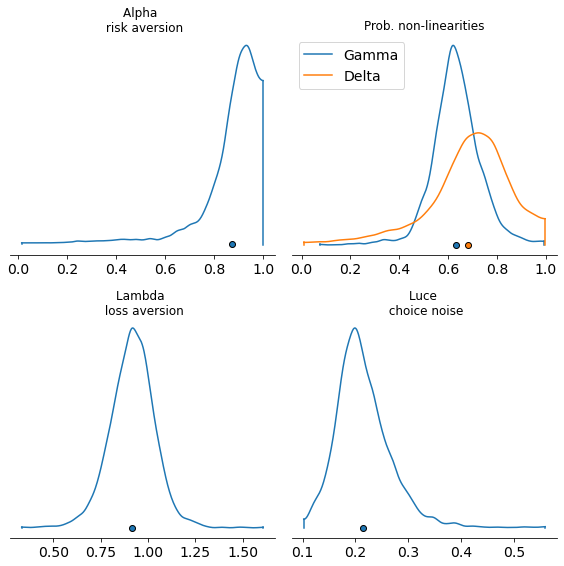

In [66]:
#Posterior plots of 6 CPT parameters (group-level)
data = az.from_pymc3(trace=trace, model=CPT)
fig, ax = plt.subplots(2,2, figsize = (8,8))
az.plot_density([st.norm.cdf(trace['mu_alpha_N'])],
                data_labels=['Alpha'],
                hdi_prob=1, ax = ax[0,0]);
az.plot_density([st.norm.cdf(trace['mu_gamma_N']),
                st.norm.cdf(trace['mu_delta_N'])],
                data_labels=['Gamma' , 'Delta'],
                hdi_prob=1, ax = ax[0,1]);
az.plot_density(np.exp(trace['mu_l_lambda_N']),
                data_labels=['Lambda'],
                hdi_prob=1, ax = ax[1,0]);
az.plot_density(np.exp(trace['mu_l_luce_N']),
                data_labels=['Luce'],
                hdi_prob=1, ax = ax[1,1]);
ax[0,0].set_title('Alpha \n risk aversion')
ax[0,1].set_title('Prob. non-linearities')
ax[1,0].set_title('Lambda \n loss aversion')
ax[1,1].set_title('Luce \n choice noise')
plt.tight_layout()
#fig.savefig('img/6_CB/Nilsson_Fig4.svg')
#plt.close()

# Exercise

Run the model with your own data. Comment/reflect.

# Conclusion

* We learn how to measure risk with BART or loteries
* We build bayesian descriptive models for:
    * FitzGibbon, et al, 2021, contrafactuales, emotions and risk
    * Kahneman & Tversy, prospect theory:
        * Some parameters were hard to recover ($\alpha=\beta$, to recuparate loss aversion $\lambda$) 
* Hierarchical:
    * Uses group information
* Non-hierarchical:
    * Pooling (participants are identical)
    * Independence (participants are unique)

In [ ]:
!jupyter nbconvert --to slides --SlidesExporter.reveal_theme='solarized' --SlidesExporter.reveal_transition='none' --SlidesExporter.reveal_scroll=True 6_Decisiones_Riesgo.ipynb #Saves slide


Para salvar las diapositivas a PDF (en Chrome), correr nbconvert para que abra las diapositivas en un servidor local (la transition y el theme son opcionales):

!jupyter nbconvert --to slides --SlidesExporter.reveal_theme='solarized' --SlidesExporter.reveal_transition='convex' nombre_de_mi_notebook.ipynb --post serve

Luego, a la dirección añadirle ?print-pdf después del .html:

http://127.0.0.1:8000/nombre_de_mi_notebook.slides.html?print-pdf

Y luego, imprimir y darle salvar como pdf

In [ ]:
#Para salvar a pdf
!jupyter nbconvert --to slides --SlidesExporter.reveal_theme='solarized' --SlidesExporter.reveal_transition='none' 6_Decisiones_Riesgo.ipynb --post serve

# Anexos

In [ ]:
#BART
dot_text = 'digraph G {rankdir=TB; compound=true; newrank=true; labelloc="t";\
           label="BART";\
           /* general properties*/\
           node [margin=0, fixedsize=true, shape=plaintext,\
                 height=0.7, width=0.7, lblstyle="font=\\small"];\
           /* links */\
           burst_prob -> number_pumps;\
           risk_taking -> number_pumps;\
           number_pumps -> logistic;\
           beh_consist -> logistic;\
           logistic -> decision;\
           subgraph cluster0 {\
               margin = 10; labeljust=l; lblstyle="font=\\small";\
               style = rounded;\
               label = "$Choice_k$";\
               subgraph cluster1 {\
                   margin = 10; labeljust=l; lblstyle="font=\\small";\
                   style = rounded;\
                   label = "$Trial_j$";\
                   logistic;\
                   decision;\
               }\
           }\
           /* nodes */\
           burst_prob [label = "$p$", fillcolor = gray, style = filled, shape = circle];\
           number_pumps [label = "$omega$", shape = circle, peripheries = 2];\
           risk_taking [label = "$gamma^{+}$", shape = circle];\
           logistic [label = "$theta_{jk}$", shape = circle, peripheries = 2];\
           beh_consist [label = "$beta$", shape = circle];\
           decision [label = "$d_{jk}$", fillcolor = gray, style = filled, shape = square];\
           }' #warning: use single quote at start and end; double quotes for labels
s = Source(dot_text, filename="img/6_CB/model_BART.gv", format="svg") #THIS IS NOT THE FINAL ONE
s.view()

#To typeset latex stuff on the image: 
#1) open svg in inkscape and write latex formulas. Export as pdf (click the one that says latex)
#   to change fontsize of latex in inkscape write before the expression: 
#        \fontsize{34pt}{1em} $latex expression$ ... change #pt for size
#2) go to overleaf or latex editor of choice and do this (https://castel.dev/post/lecture-notes-2/):
#   2.1) In the preamble:
#  \usepackage{import}
#  \usepackage{xifthen}
#  \usepackage{pdfpages}
#  \usepackage{transparent}
#  \usepackage{graphics} 

#  \newcommand{\incfig}[1]{%
#      \def\svgwidth{\columnwidth}
#      \import{./figures/}{#1.pdf_tex} %PUT the inkscape .pdf_tex AND .pdf in a local folder called figures
#  }
#   2.2)In the body:
#  \begin{figure}[ht]
#      \centering
#      \scalebox{.65}{\incfig{your_inkscape.pdf_tex}} #change scalebox proportion to rescale
#      \caption{Riemmans theorem}
#      \label{fig:riemmans-theorem}
#  \end{figure}

In [ ]:
#BART hierarchical
dot_text = 'digraph G {rankdir=TB; compound=true; newrank=true; labelloc="t";\
           label="BART";\
           /* general properties*/\
           node [margin=0, fixedsize=true, shape=plaintext,\
                 height=0.7, width=0.7, lblstyle="font=\\small"];\
           /* links */\
           burst_prob -> number_pumps;\
           risk_taking -> number_pumps;\
           mu_risk_taking -> risk_taking;\
           sigma_risk_taking -> risk_taking;\
           number_pumps -> logistic;\
           beh_consist -> logistic;\
           mu_beh_consist -> beh_consist;\
           sigma_beh_consist -> beh_consist;\
           logistic -> decision;\
           subgraph cluster0 {\
               margin = 10; labeljust=l; lblstyle="font=\\small";\
               style = rounded;\
               label = "$Conditions_i$";\
               risk_taking;\
               beh_consist;\
               number_pumps;\
               subgraph cluster1 {\
                   margin = 10; labeljust=l; lblstyle="font=\\small";\
                   style = rounded;\
                   label = "$Choice_k$";\
                   subgraph cluster2 {\
                       margin = 10; labeljust=l; lblstyle="font=\\small";\
                       style = rounded;\
                       label = "$Trial_j$";\
                       logistic;\
                       decision;\
                   }\
               }\
           }\
           /* nodes */\
           burst_prob [label = "$p$", fillcolor = gray, style = filled, shape = circle];\
           number_pumps [label = "$omega_i$", shape = circle, peripheries = 2];\
           risk_taking [label = "$gamma_i^{+}$", shape = circle];\
           mu_risk_taking [label = "$mu_{gamma^{+}}$", shape = circle];\
           sigma_risk_taking [label = "$sigma_{gamma^{+}}$", shape = circle];\
           logistic [label = "$theta_{ijk}$", shape = circle, peripheries = 2];\
           beh_consist [label = "$beta_i$", shape = circle];\
           mu_beh_consist [label = "$mu_{beta}$", shape = circle];\
           sigma_beh_consist [label = "$sigma_{beta}$", shape = circle];\
           decision [label = "$d_{ijk}$", fillcolor = gray, style = filled, shape = square];\
           }' #warning: use single quote at start and end; double quotes for labels
s = Source(dot_text, filename="img/6_CB/model_BART_hierarchical.gv", format="svg") #THIS IS NOT THE FINAL ONE
s.view()

#\mu_{\gamma^{+}} \sim Uniform(0,10)
#\sigma_{\gamma^{+}} \sim Uniform(0,10)
#\mu_{\beta} \sim Uniform(0,10)
#\sigma_{\beta} \sim Uniform(0,10)
#\gamma_i^{+} \sim Normal(\mu_{\gamma^{+}}, \sigma_{\gamma^{+}})
#\beta_i \sim Normal(\mu_{\beta}, \sigma_{\beta})
#\omega_i = -frac{\gamma_i^{+}}{log(1-p)}
#\theta_{ijk} = \frac{1}{1 + e^{\beta_i (k-\omega_i)}}
#\d_{ijk} \sim Bernoulli(\theta_{ijk})

In [ ]:
#CPT
dot_text = 'digraph G {rankdir=TB; compound=true; newrank=true; labelloc="t";\
           label="Cumulative Prospect Theory";\
           /* general properties*/\
           node [margin=0, fixedsize=true, shape=plaintext,\
                 height=0.55, width=0.55, lblstyle="font=\\small"];\
           /* links */\
           hyper_mu_sd -> alpha_normal;\
           hyper_mu_sd -> beta_normal;\
           hyper_mu_sd -> gamma_normal;\
           hyper_mu_sd -> delta_normal;\
           hyper_mu_sd_exp -> lambda_normal;\
           hyper_mu_sd_exp -> phi_normal;\
           subgraph cluster0 {\
               margin = 10; labeljust=l; lblstyle="font=\\small";\
               style = rounded;\
               label = " "; texlbl = "$\;\;\;\;\;\;\;\;\;\;\;\; i$ Individuo";\
               alpha_normal -> alpha;\
               beta_normal -> beta;\
               gamma_normal -> gamma;\
               delta_normal -> delta;\
               phi_normal -> phi;\
               lambda_normal -> lambd;\
               alpha -> val;\
               lambd -> val;\
               beta -> val;\
               gamma -> w_prob;\
               delta -> w_prob;\
               phi -> choice;\
               subgraph cluster1 {\
                   margin = 10; labeljust=l; lblstyle="font=\\small";\
                   style = rounded;\
                   label = " "; texlbl = "$\;\;\;\;\;\;\;\;\;\;\; t$ Turno";\
                   x -> val;\
                   x -> c;\
                   c -> w_prob;\
                   p -> w_prob;\
                   val -> EV;\
                   w_prob -> EV;\
                   EV -> choice;\
                   choice -> choice_data;\
               }\
           }\
           choice_data -> choice_data_dist -> hyper_mu_dist -> hyper_sd_dist -> hyper_mu_dist_exp -> hyper_sd_dist_exp -> alpha_normal_dist ->  alpha_dist -> beta_normal_dist -> beta_dist -> gamma_normal_dist -> gamma_dist -> delta_normal_dist -> delta_dist -> lambda_normal_dist -> lambda_dist -> phi_normal_dist -> phi_dist -> val_dist -> c_dist -> w_prob_dist -> EV_dist -> choice_dist [style = invis];\
           /* nodes */\
           hyper_mu_sd [texlbl = "$(\\mu,\\sigma)$", shape = circle];\
           hyper_mu_dist[texlbl = "$\\mu \sim Normal(0,1)$"];\
           hyper_sd_dist [texlbl = "$\\sigma \sim Uniform(0,10)$"];\
           hyper_mu_sd_exp [texlbl = "$(\\mu_l,\\sigma_l)$", shape = circle];\
           hyper_mu_dist_exp [texlbl = "$\\mu_l \sim Uniform(-2.3,1.61)$"];\
           hyper_sd_dist_exp  [texlbl = "$\\sigma_l \sim Uniform(0,1.13)$"];\
           alpha_normal [texlbl = "$\\alpha_{N_i}$", shape = circle];\
           alpha_normal_dist [texlbl = "$\\alpha_{N_i} \sim Normal(\\mu,\\sigma)[-3,3]$"];\
           alpha [texlbl = "$\\alpha_i$", shape = circle, peripheries = 2];\
           alpha_dist  [texlbl = "$\\alpha_i \sim Std-Normal_{CDF}(\\alpha_{N_i})$"];\
           beta_normal [texlbl = "$\\beta_{N_i}$", shape = circle];\
           beta_normal_dist [texlbl = "$\\beta_{N_i} \sim Normal(\\mu,\\sigma)[-3,3]$"];\
           beta [texlbl = "$\\beta_i$", shape = circle, peripheries = 2];\
           beta_dist  [texlbl = "$\\beta_i \sim Std-Normal_{CDF}(\\beta_{N_i})$"];\
           gamma_normal [texlbl = "$\\gamma_{N_i}$", shape = circle];\
           gamma_normal_dist [texlbl = "$\\gamma_{N_i} \sim Normal(\\mu,\\sigma)[-3,3]$"];\
           gamma [texlbl = "$\\gamma_i$", shape = circle, peripheries = 2];\
           gamma_dist  [texlbl = "$\\gamma_i \sim Std-Normal_{CDF}(\\gamma_{N_i})$"];\
           delta_normal [texlbl = "$\\delta_{N_i}$", shape = circle];\
           delta_normal_dist [texlbl = "$\\delta_{N_i} \sim Normal(\\mu,\\sigma)[-3,3]$"];\
           delta [texlbl = "$\\delta_i$", shape = circle, peripheries = 2];\
           delta_dist  [texlbl = "$\\delta_i \sim Std-Normal_{CDF}(\\delta_{N_i})$"];\
           lambda_normal [texlbl = "$\\lambda_{N_i}$", shape = circle];\
           lambda_normal_dist [texlbl = "$\\lambda_{N_i} \sim Normal(\\mu_l,\\sigma_l)$"];\
           lambd [texlbl = "$\\lambda_i$", shape = circle, peripheries = 2];\
           lambda_dist  [texlbl = "$\\lambda_i \sim e^{\\lambda_{N_i}}$"];\
           phi_normal [texlbl = "$\\phi_{N_i}$", shape = circle];\
           phi_normal_dist [texlbl = "$\\phi_{N_i} \sim Normal(\\mu_l,\\sigma_l)$"];\
           phi [texlbl = "$\\phi_i$", shape = circle, peripheries = 2];\
           phi_dist  [texlbl = "$\\phi_i \sim e^{\\phi_{N_i}}$"];\
           x [texlbl = "$x_{it}$", shape = circle, fillcolor = gray, style = filled];\
           p [texlbl = "$p_{it}$", shape = circle, fillcolor = gray, style = filled];\
           c [texlbl = "$c_{it}$", shape = circle];\
           c_dist [texlbl = "$c_{it} = \\left\\lbrace \\parbox{7cm}{$\\gamma_i \;\;\;\;\;\; x_{it} \ge 0$ \\\ \\\ $\\delta_i \;\;\;\;\;\; x_{it} <0 $} \\right.$"];\
           w_prob [texlbl = "$\\pi(p_{it})$", shape = circle];\
           w_prob_dist [texlbl = "$\\pi(p_{it})= \\frac{p_{it}^c}{(p_{it}^c-(1-p_{it}^c))^{1/c}}$"];\
           val [texlbl = "$v(x_{it})$", shape = circle];\
           val_dist [texlbl = "$v(x_{it}) = \\left\\lbrace \\parbox{7cm}{$x_{it}^{\\alpha_i} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; x_{it} \ge 0$ \\\ \\\ $-\\lambda_i(-x_{it})^{\\beta} \;\;\;\; x_{it} <0 $} \\right.$"];\
           EV [texlbl = "$V(O)$", shape = circle, peripheries = 2];\
           EV_dist [texlbl = "$V(O) = \pi(p_{it_A})v(x_{it_A}) + \pi(p_{it_B})v(x_{it_B})$"];\
           choice [texlbl = "$p_{it}(A,B)$", shape = circle];\
           choice_dist [texlbl = "$p_{it}(A,B) = \\frac{1}{1+e^{\\phi (V(B_t)-V(A_t))}}$"];\
           choice_data [texlbl = "$Choice_{it}$", shape = square, style = filled, fillcolor = gray];\
           choice_data_dist [texlbl = "$Choice_{it} \sim Bernoulli(p_{it}(A,B))$"];\
           }' #warning: use single quote at start and end; double quotes for labels
tex = d2t.dot2tex(dot_text, format='tikz', preproc = True) #makes sure it looks good in tex
tex = d2t.dot2tex(dot_text, texmode = 'verbatim', crop=True) #crop: the page size equal to the model
diagram_tex = open('img/6_CB/model_CPT.tex', 'w')
diagram_tex.write(tex) 
diagram_tex.close()

# this builds a pdf-file inside a directory
pdf = build_pdf(tex)
pdf.save_to('img/6_CB/model_CPT.pdf') #convertir a svg y pulir/editar posiciones en inkscape

In [ ]:
# CPT images for trials
# Gambles shown to participants. 
# A and B appeared on the left or right randomly
gambles_A = pd.read_table("data/6_CB/GambleA.txt", header=None)
gambles_A.columns = ['Reward_1', 'Prob_1', 'Reward_2', 'Prob_2']
gambles_B = pd.read_table("data/6_CB/GambleB.txt", header=None)
gambles_B.columns = ['Reward_1', 'Prob_1', 'Reward_2', 'Prob_2']
ntrials = gambles_B.shape[0]
file_address_psychopy = []
for n in range(ntrials):
    if n<60: #win trials
        colors = ['#228B22','#20B2AA']
        title = 'GANAR'
    elif n>59 and n<120:
        colors = ["#8B0000", '#FF0000']
        title = 'PERDER'
    else:
        colors = ["#228B22", '#FF0000']
        title = 'GANAR & PERDER'
        
    # Creating plot
    fig = plt.figure(figsize=(12,5), constrained_layout=True)
    spec = GridSpec(ncols=28, nrows=1, figure=fig)
    ax0 = fig.add_subplot(spec[0, 0:1])
    ax1 = fig.add_subplot(spec[0, 2:12])
    ax2 = fig.add_subplot(spec[0, 13:14])
    ax3 = fig.add_subplot(spec[0, 15:25])
    ax4 = fig.add_subplot(spec[0, 26:27])
    #fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(9,3)) #ax1,ax2 refer to your two pies
    
    labels = gambles_A.loc[n,['Reward_1', 'Reward_2']]*1000
    labels = ["${:,.0f}".format(labels[0]), "${:,.0f}".format(labels[1])]
    values = gambles_A.loc[n,['Prob_1', 'Prob_2']]
    _, texts, autotexts = ax1.pie(values, labels = labels,
                              colors = colors,autopct = '%1.1f%%', radius=1.5) #plot first pie
    [ _.set_fontsize(16) for _ in texts ]
    [ _.set_fontsize(12) for _ in autotexts ]    
    #ax1.axis('equal')
    ax1.set_ylim(-1,2)
    ax1.set_title(title, fontsize = 18)
    for autotext in autotexts:
        autotext.set_color('white')

    ax0.set_axis_off()
    ax1.set_axis_off()
    ax2.set_axis_off()
    ax3.set_axis_off()
    ax4.set_axis_off()

    labels = gambles_B.loc[n,['Reward_1', 'Reward_2']]*1000
    labels = ["${:,.0f}".format(labels[0]), "${:,.0f}".format(labels[1])]
    values = gambles_B.loc[n,['Prob_1', 'Prob_2']]
    _, texts, autotexts = ax3.pie(values, labels = labels, 
                              colors = colors,autopct = '%1.1f%%', radius=1.5) #plot first pie
    [ _.set_fontsize(16) for _ in texts ]
    [ _.set_fontsize(12) for _ in autotexts ]
    ax3.set_ylim(-1,2)
    #ax3.axis('equal')
    ax3.set_title(title, fontsize = 18)
    for autotext in autotexts:
        autotext.set_color('white')
    file_address_psychopy.append('img/GP_' + str(n) + '.png')
    fig.savefig('exp/6_CB/img/GP_' + str(n) + '.png')
    plt.close()     
#bbox_inches= "tight"
f.to_csv('exp/6_CB/img_links.csv')
      
   

In [ ]:
#Hierarchical BART (FitzGibbon, et al, 2021)
p = 0.5
npump_max = 12 #from the Fitzgibbon experimental design
#emo_change_scale = [-200,200] #from the Fitzgibbon paper
emo_change_scale = [-3,3] #standardized (zscore; see cell above)
delta_emo_data = np.array(Data['emotion_change_rating'])
info = np.array(Data['information_sought'])
info_boolean = np.array(info, dtype = 'bool')
diff_limit = np.array(Data['diff_pumps_limit'])
npumps_next_trial = np.array(Data['next_trial_n_pumps'])
k = 2; #info and no info
chains = 4
with pm.Model() as BART_CF:
    #priors
    mu_g = pm.Uniform("mu_g", lower = 0, upper = 10)
    sigma_g = pm.Uniform("sigma_g", lower = 0, upper = 10)
    mu_b = pm.Uniform("mu_b", lower = 0, upper = 1)
    sigma_b = pm.Uniform("sigma_b", lower = 0, upper = 3)
    mu_intercept = pm.Uniform("mu_i", lower = -3, upper = 3, shape = 2)
    mu_slope = pm.Uniform("mu_s", lower = -2, upper = 2, shape = 2)
    sigma_intercept = pm.Uniform("sigma_i", lower = 0, upper = 3, shape = 2)
    sigma_slope = pm.Uniform("sigma_s", lower = 0, upper = 3, shape = 2)
    sigma_emo = pm.Uniform('sigma_emo', lower = 0 , upper = 3, shape = 2)

    gammap = pm.Normal("gammap", mu=mu_g, sd=sigma_g, shape=k)
    beta = pm.Normal("beta", mu=mu_b, sd=sigma_b, shape=k)

    omega = -gammap[info] / np.log(1 - p)
    
    thetajk = 1 - pm.math.invlogit(-beta[info] * (npumps_next_trial - omega))
    
    intercept = pm.Normal('intercept', 
                          mu = mu_intercept, 
                          sd = sigma_intercept, shape = 2)
    slope = pm.Normal('slope', 
                      mu = mu_slope, 
                      sd = sigma_slope, shape = 2)
    
    #likelihood
    mu_emo = intercept[0] + slope[0]*diff_limit[~info_boolean]
    delta_emo_no_info = pm.Normal('delta_emo_no_info', mu = mu_emo, sigma = sigma_emo[0], 
                                  observed = delta_emo_data[~info_boolean])
    
    mu_emo = intercept[1] + slope[1]*diff_limit[info_boolean]
    delta_emo_info = pm.Normal('delta_emo_info', mu = mu_emo, sigma = sigma_emo[1], 
                           observed = delta_emo_data[info_boolean])
    
    dj = pm.Binomial("dj", p=thetajk, n=npump_max, observed=npumps_next_trial)
    
    #get starting values with variational inference
    approx = pm.fit(
        n=10000, method="advi", obj_optimizer=pm.adagrad_window
    )  # type: pm.MeanField
    start = approx.sample(draws=chains, include_transformed=True)
    #sample
    trace = pm.sample(
         tune=2000, target_accept=0.99, chains=chains, cores = 4, 
        init="adapt_diag", start=list(start)
    )

    data = az.from_pymc3(trace=trace)
    ppc = pm.sample_posterior_predictive(trace)

In [ ]:
print(s)
az.plot_trace(data, var_names=["gammap", "beta", 'intercept', 'slope']);

In [ ]:
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=BART_CF));

In [ ]:
#The model seems to qualitatively predict the data fairly well
plt.figure(figsize=(5, 5)); 
idx = Data['information_sought']==1
plt.plot(diff_limit[idx], delta_emo_data[idx], '.b',  label = 'Info')
hdi_intercept = az.hdi(trace['intercept'][:,1]) #high density interval
hdi_slope = az.hdi(trace['slope'][:,1])
x = np.linspace(-1,12)
y = trace['slope'][:,1].mean()*x + trace['intercept'][:,1].mean()
plt.plot(x,y, color='blue')
plt.fill_between(y1=hdi_slope[0]*x + hdi_intercept[0], 
                 y2= hdi_slope[1]*x + hdi_intercept[1],
                 x=x, alpha=0.15, color='blue');
plt.ylabel("Emotion-Change Rating", fontsize=16); 
plt.xlabel("Missed Oppotunity", fontsize=16);


idx = Data['information_sought']==0
plt.plot(diff_limit[idx], delta_emo_data[idx], '.r',  label = 'No info')
hdi_intercept = az.hdi(trace['intercept'][:,0]) #high density interval
hdi_slope = az.hdi(trace['slope'][:,0])
x = np.linspace(-1,12)
y = trace['slope'][:,0].mean()*x + trace['intercept'][:,0].mean()
plt.plot(x,y, color='red')
plt.fill_between(y1=hdi_slope[0]*x + hdi_intercept[0], 
                 y2= hdi_slope[1]*x + hdi_intercept[1],
                 x=x, alpha=0.15, color='red');
#plt.ylim(-250,250)
plt.ylabel("Emotion-Change Rating", fontsize=16); 
plt.xlabel("Missed Oppotunity", fontsize=16);
plt.legend(loc = 'upper left');